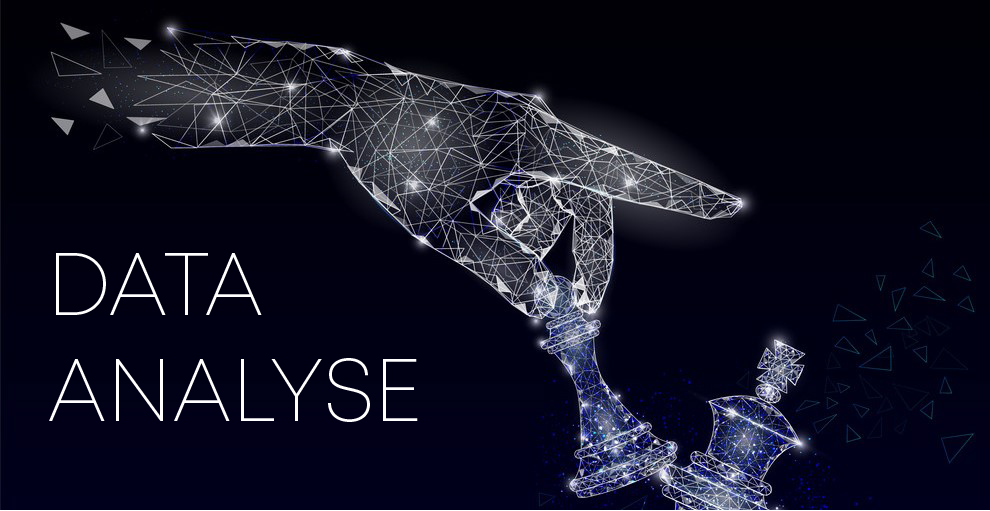
#### source : https://blog.mbadmb.com/tout-savoir-sur-le-metier-de-data-analyst/data-analyse-strategy/

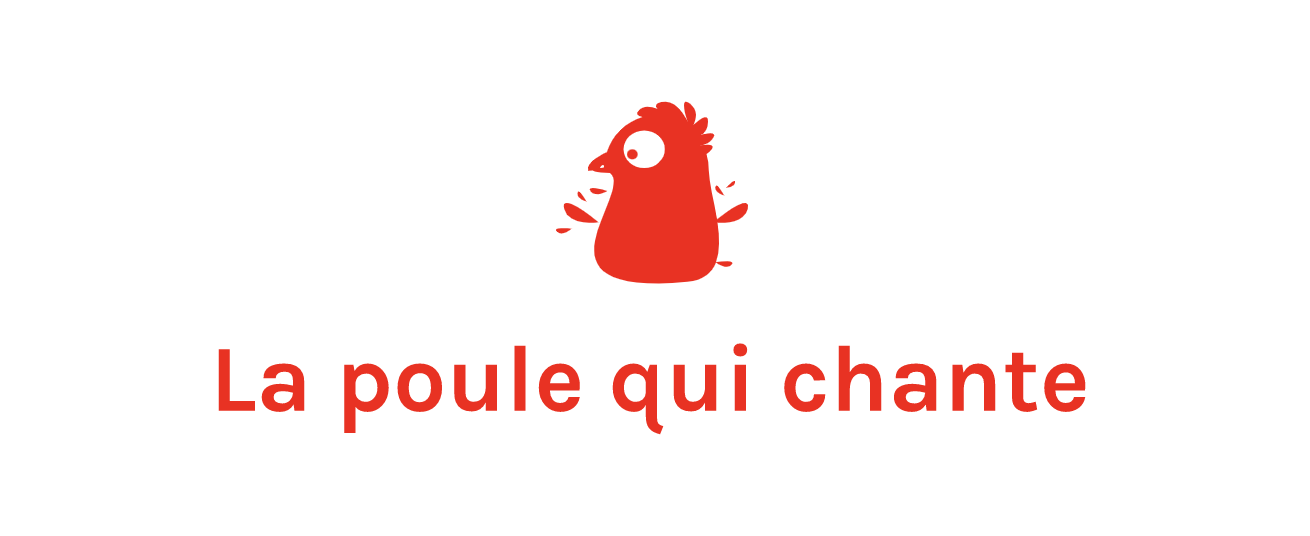

## - NoteBook 2 -
---
### 1 - Test de Classification Ascendante Hiérarchique avec dendrogramme.
### 2 - Méthode des K-MEANS.
### 3 - Comparaison des deux méthodes de clustering.
### 4 - Analyse du centroïde des classes.
### 5 - Analyse en Composantes Principales.
### 6 - Synthèse de compréhension (groupes, liens entre les variables, liens entre les individus).
### 7 - Heatmap avec croisements entre clusters de pays et les différentes variables (image).
### 8 - Synthèse finale sur les groupes choisis.

---

In [1]:
pip install sklearn.inspection

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.inspection (from versions: none)
ERROR: No matching distribution found for sklearn.inspection


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

# libraire CAH :
from scipy.cluster.hierarchy import dendrogram, linkage

# libraire silhouette score :
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import mean_squared_error

# Import Libraries
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
import itertools

In [3]:
# Lecture des données :
dispo_alim_complet = pd.read_csv('dispo_alim_complet.csv', sep = ",", header = 0)

In [4]:
# On mets la variable "zone" en index :
dispo_alim_complet = dispo_alim_complet.set_index("zone")

In [5]:
# Suppression des Nans :
dispo_alim_complet = dispo_alim_complet.fillna(0)

In [6]:
dispo_alim_complet.shape # DataFrame avec conservation de toutes les colonnes

(172, 18)

In [7]:
# Après vérification nous avons 2 pays de plus dans dispo_alim_complet car nous gardons toutes les variables mais 
# ces 2 pays n'importent pas de poulet.

# Supprimons les afin d'éviter les problèmes d'indexation sans liens :
dispo_alim_complet = dispo_alim_complet.loc[(dispo_alim_complet.index != "République démocratique populaire lao") &
                                            (dispo_alim_complet.index != "Ouzbékistan"), :]

In [8]:
dispo_alim_complet.shape

(170, 18)

---

# 🚀 LES CRITÈRES D'UN BON ALGO DE CLUSTERING :

#### 3 familles de critères permettent d'évaluer si le résultat d'un algorithme de clustering est satisfaisant :
### Ces 3 familles sont basées sur : 
#### 🕵️‍♂️ Forme des clusters
#### 🕵️‍ Stabilité des clusters (beaucoup d'algo non déterministes, différents résultats à chaque itération)
#### 🕵️‍ Compatibilité avec des connaissances spécifiques au domaine

---
---
---

# Pré-analyses :

#### Après un premier cycle d'analyse et de réglages voici les constatations et la poursuite d'analyse.
#### La population biaisaient les résultats du clustering car sa variance est extrême.
#### Mise en place d'une fonction logarithmique pour désamplifier l'impact de sa variation. (Sinon cela conduit à des résultats plutôt orientés volume de population alors que notre objectif est "importation de poulet")

In [9]:
dispo_alim_complet['population_en_milliers'] = np.log(dispo_alim_complet['population_en_milliers'])

---

# Classifications Ascendantes Hiérarchiques :

---

## 1 - CAH sur toutes nos variables en même temps :

---

### Analyse dendrographiques dans différentes métriques :

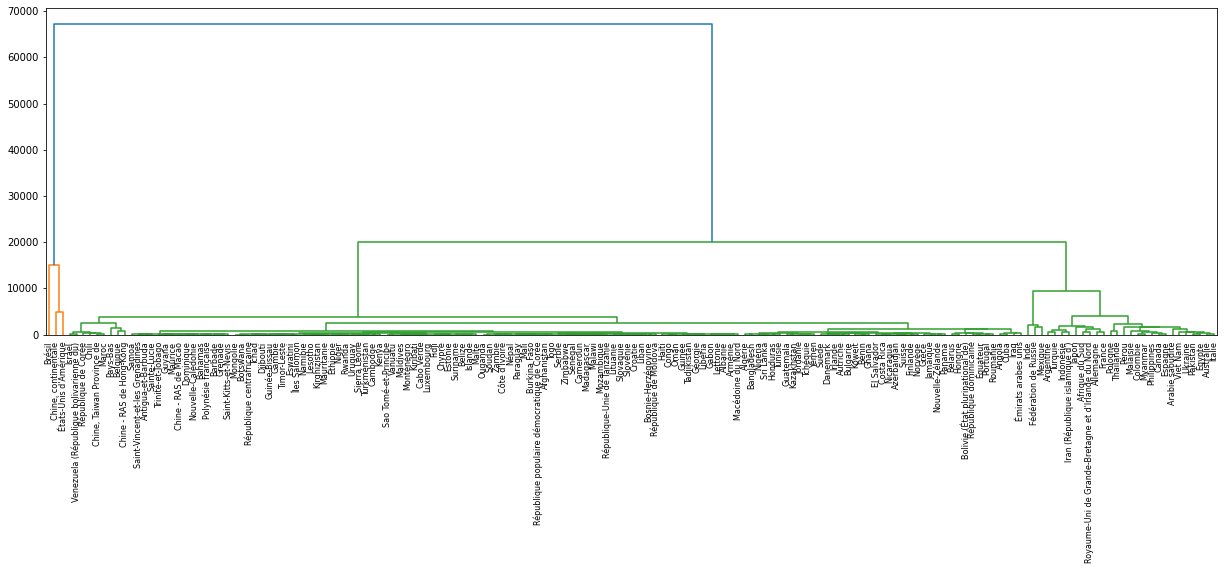

In [10]:
# Calcul de la distance entre chaque individu avec scipy :
Z = linkage(dispo_alim_complet, 'ward')

# Affichage de notre dendrogramme :
plt.figure(figsize=(21,6)) # figsize=(21,16) pour afficher le diagramme plus grand
dendrogram(Z,leaf_rotation = 90,
           leaf_font_size = 8, # modifiable si on veut changer la taille d'écriture des pays
           labels = dispo_alim_complet.index # nom des colonnes 
          )
plt.show()

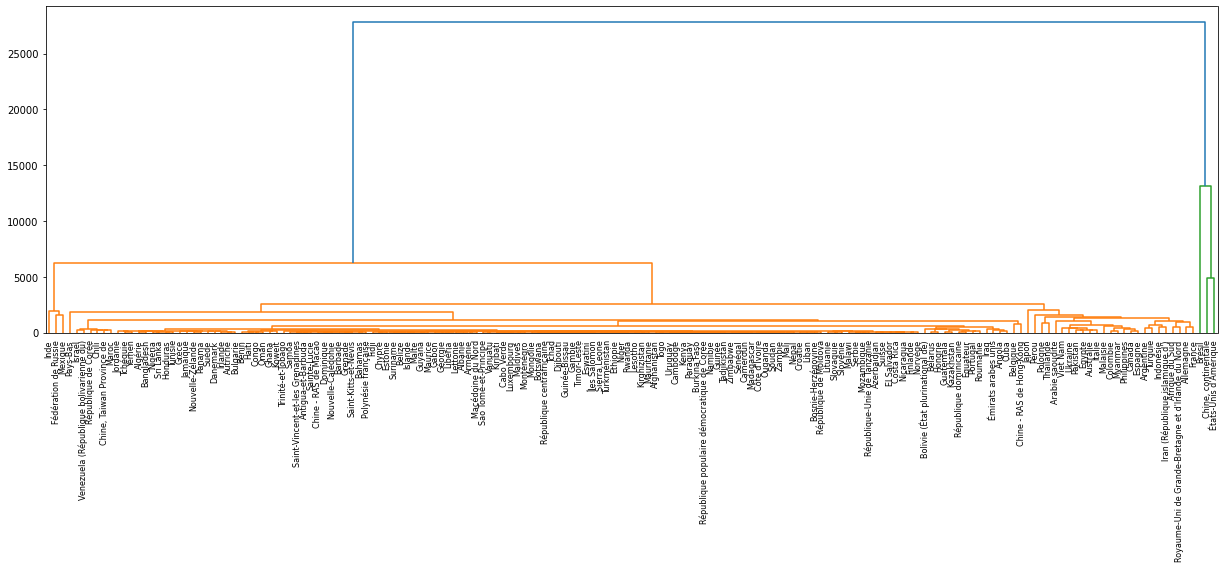

In [11]:
# Calcul de la distance entre chaque individu avec scipy :
Z = linkage(dispo_alim_complet, 'average')

# Affichage de notre dendrogramme :
plt.figure(figsize=(21,6)) # figsize=(21,16) pour afficher le diagramme plus grand
dendrogram(Z,leaf_rotation = 90,
           leaf_font_size = 8, # modifiable si on veut changer la taille d'écriture des pays
           labels = dispo_alim_complet.index # nom des colonnes
          )
plt.show()

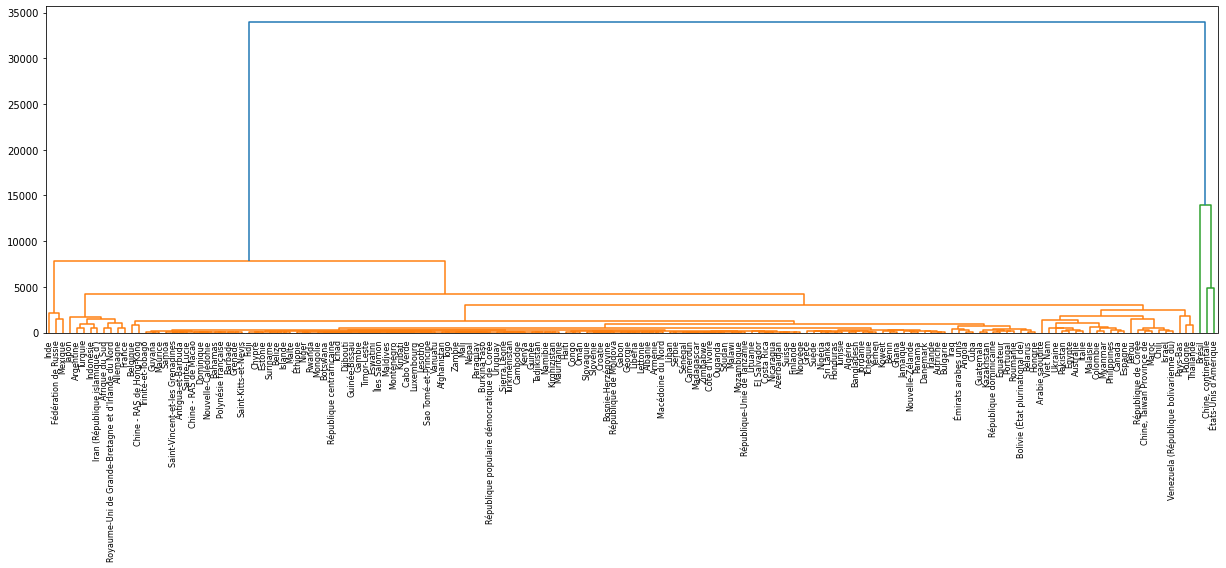

In [12]:
# Calcul de la distance entre chaque individu avec scipy :
Z = linkage(dispo_alim_complet, 'complete')

# Affichage de notre dendrogramme :
plt.figure(figsize=(21,6)) # figsize=(21,16) pour afficher le diagramme plus grand
dendrogram(Z,leaf_rotation = 90,
           leaf_font_size = 8, # modifiable si on veut changer la taille d'écriture des pays
           labels = dispo_alim_complet.index # nom des colonnes 
          )
plt.show()

# Observations :
## 2 clusters principaux orange et vert.
## Avec la distance de ward 3 ou 5 clusters permettent une belle descente dans la pécision.

---
---

# 1.1- Contrôle de silhouette du clustering via la méthode KMEANS :

---

### 🎯 Le coefficient de silhouette est calculé à l'aide de la distance moyenne intra-grappe et de la distance moyenne de la grappe la plus proche pour chaque échantillon.

#### 📌 La meilleure valeur est 1 et la pire valeur est -1.
#### 📌 Les valeurs proches de 0 indiquent des clusters qui se chevauchent.
#### 📌 Les valeurs négatives indiquent généralement un échantillon affecté au mauvais groupe, car un groupe différent est plus similaire.

---

[0.9507022  0.7870982  0.78486938 0.78700381 0.77964442 0.70878442
 0.60965828 0.60641995 0.50057369 0.59780722 0.49667948 0.49121761
 0.50094177 0.49210476 0.49311296]


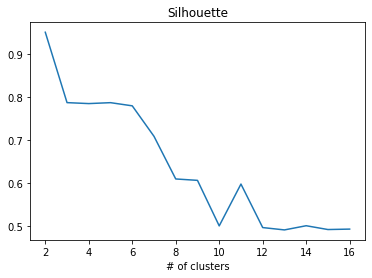

In [13]:
# Test du nombre de clusters avec la métrique silouhette :

res = np.arange(15, dtype = "double")
for k in np.arange(15):
    km = KMeans(n_clusters = k + 2)
    km.fit(dispo_alim_complet)
    res[k] = metrics.silhouette_score(dispo_alim_complet, km.labels_)
print(res)

# Affichage graphique :

plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2, 17, 1), res)
plt.show()

#### pour k = 2 nous avons 0.9507022 de silhouette.
#### pour k = 3 nous avons 0.7870982 de silhouette.
### 📌 2 à 3 clusters conservent un maximum de silhouette.

---

# Analyses basées sur la méthode Elbow : 

## Méthode dîte "du coude" :

C:\Users\cyril\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


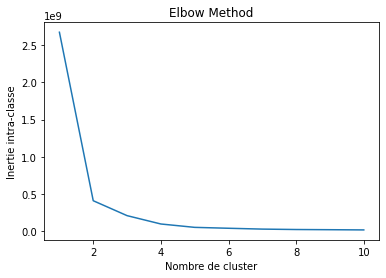

In [14]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(dispo_alim_complet)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Nombre de cluster')
plt.ylabel('Inertie intra-classe')
plt.show()

### Résultats :
#### Zone optimale 3 clusters.

### Observation :
#### Les différentes méthodes employées convergent vers les mêmes résultats, nous avons trouvé un nombre de clusters stable et fiable.

---
---
---

# Lançons une prédiction pour voir à quel cluster chaque pays est rattaché :

In [15]:
X = dispo_alim_complet

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(X)

KMeans(n_clusters=3, random_state=0)

### Prédiction des clusters pour chacun de nos pays :

In [16]:
model.predict(X)

array([0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0])

In [17]:
# Mise en DataFrame des clusters affiliés pour exploitation graphique :

y_cluster_predict_kmean = model.predict(X)
X_with_clusters = X
X_with_clusters["cluster"] = y_cluster_predict_kmean
X_with_clusters

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,population_en_milliers,cluster
zone,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0,0.0,10.499466,0
Afrique du Sud,0.0,0.0,0.0,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0,0.0,10.950978,2
Albanie,0.0,0.0,0.0,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,0.0,0.0,4.0,7.966992,0
Algérie,0.0,0.0,0.0,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0,0.0,10.630775,0
Allemagne,0.0,0.0,0.0,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,0.0,167.0,-29.0,11.322472,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.0,0.0,0.0,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,0.0,48.0,0.0,0.0,0.0,-26.0,9.157699,0
Équateur,0.0,0.0,0.0,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,0.0,0.0,-1.0,9.728262,0
États-Unis d'Amérique,0.0,0.0,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,0.0,21914.0,0.0,0.0,77.0,80.0,12.691841,1


In [18]:
X = X.drop(columns=['cluster'])

---

## Intensité de la variance de nos variables :

{'whiskers': [<matplotlib.lines.Line2D at 0x120ad7a2520>,
 'caps': [<matplotlib.lines.Line2D at 0x120ad7a2ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x120ad7a2250>,
 'medians': [<matplotlib.lines.Line2D at 0x120ad7ad0a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x120ad7ad370>,
 'means': []}

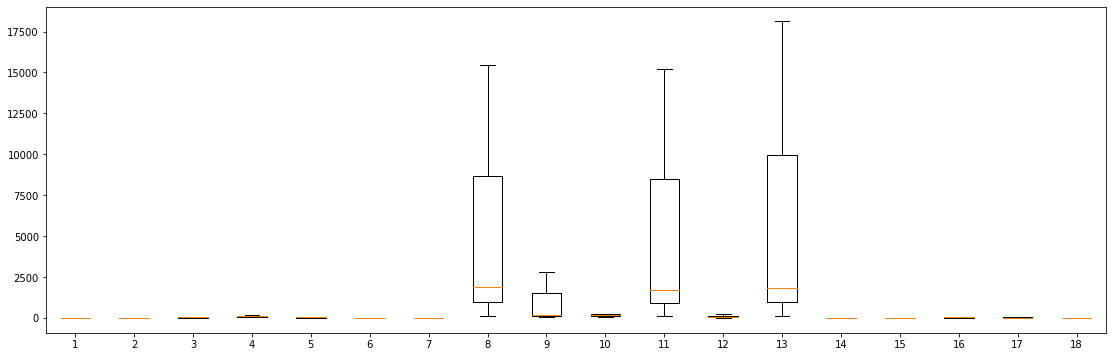

In [19]:
plt.figure(figsize = (19,6))
plt.boxplot(model.cluster_centers_)

# On voit que les variables suivantes sont les plus déterministes dans notre classification :
#### 8 (Disponibilité intérieure)
#### 9 (Exportations - Quantité)
#### 11 (Importations - Quantité)
#### 13 (Production)

---

## Caractérisation des clusters selon importation et production :

#### Un cluster différent par couleurs différentes :

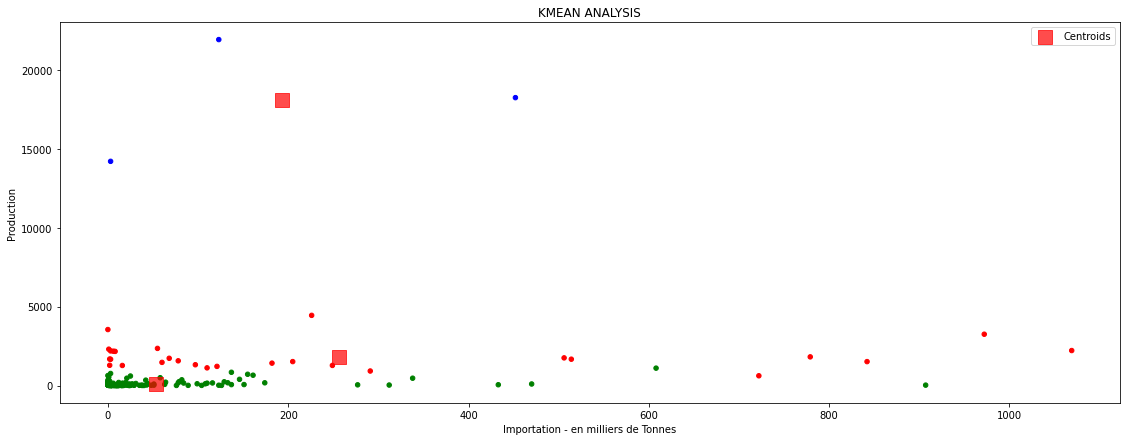

In [20]:
colormap = np.array(["green", "blue", "red"])
plt.figure(figsize = (19, 7))

plt.scatter(X['Importations - Quantité'], X['Production'], c = colormap[y_cluster_predict_kmean], s = 20)
plt.scatter(model.cluster_centers_[:, 9], model.cluster_centers_[:, 12],
            s = 200, marker = 's', c = 'red', alpha = 0.7, label = 'Centroids')

plt.title('KMEAN ANALYSIS')
plt.xlabel('Importation - en milliers de Tonnes')
plt.ylabel('Production')
plt.legend()
plt.show()

## Caractérisation des clusters selon importation et exportation :

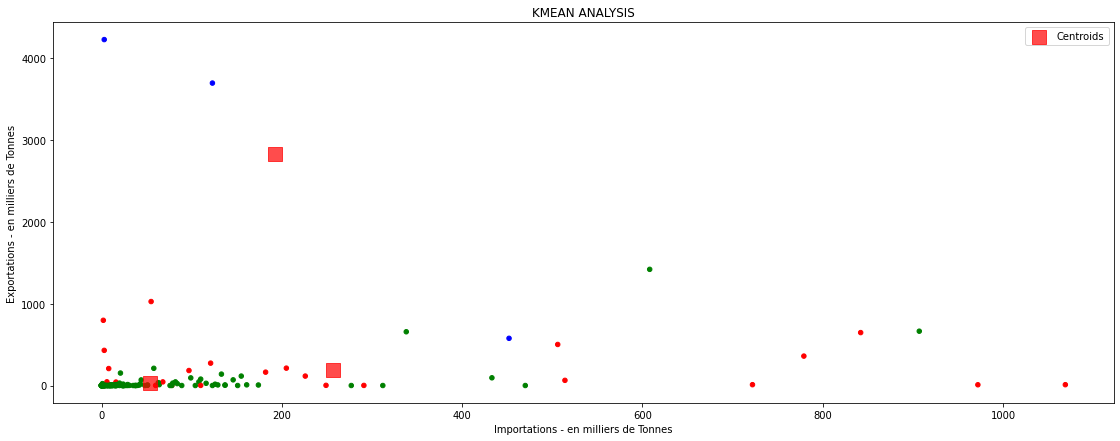

In [21]:
colormap = np.array(["green", "blue", "red"])
plt.figure(figsize = (19, 7))
plt.scatter(X['Importations - Quantité'], X['Exportations - Quantité'], c = colormap[y_cluster_predict_kmean], s = 20)
plt.scatter(model.cluster_centers_[:, 9], model.cluster_centers_[:, 8],
            s = 200, marker = 's', c = 'red', alpha = 0.7, label = 'Centroids')

plt.title('KMEAN ANALYSIS')
plt.xlabel('Importations - en milliers de Tonnes')
plt.ylabel('Exportations - en milliers de Tonnes')
plt.legend()
plt.show()

## Caractérisation des clusters selon  exportation et production :

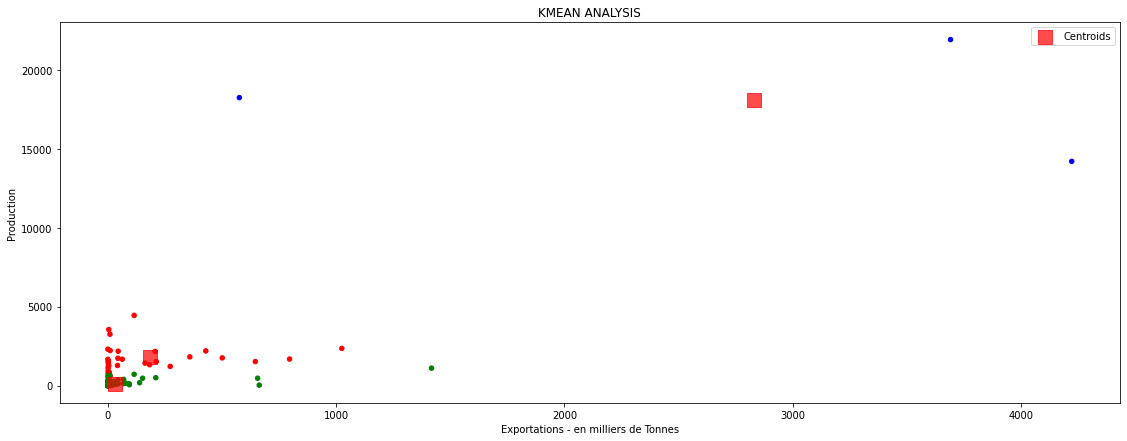

In [22]:
colormap = np.array(["green", "blue", "red"])
plt.figure(figsize = (19, 7))
plt.scatter(X['Exportations - Quantité'], X['Production'], c = colormap[y_cluster_predict_kmean], s = 20)
plt.scatter(model.cluster_centers_[:, 8], model.cluster_centers_[:, 12],
            s = 200, marker = 's', c = 'red', alpha = 0.7, label = 'Centroids')

plt.title('KMEAN ANALYSIS')
plt.xlabel('Exportations - en milliers de Tonnes')
plt.ylabel('Production')
plt.legend()
plt.show()

In [23]:
# Récupération de la matrice de coordonnées des centroïdes de nos clusters pour chaque variable :

model.cluster_centers_

array([[ 1.22302158e-01,  0.00000000e+00,  2.21582734e+00,
         6.97697842e+01,  1.90701439e+01,  4.56633094e+00,
         6.69892086e+00,  1.31805755e+02,  3.02661871e+01,
         5.36330935e+01,  1.27446043e+02,  1.81294964e+00,
         1.15690647e+02, -2.21582734e+00,  0.00000000e+00,
         2.38848921e+00,  7.22302158e+00,  8.45434200e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.96666667e+01,
         1.60666667e+02,  3.86800000e+01,  1.16133333e+01,
         1.31900000e+01,  1.54696667e+04,  2.83033333e+03,
         1.92666667e+02,  1.52000000e+04,  2.14333333e+02,
         1.81170000e+04, -3.33333333e-01,  0.00000000e+00,
         2.60000000e+01,  1.00000000e+01,  1.30344074e+01],
       [-2.77555756e-17,  0.00000000e+00,  3.93928571e+01,
         9.27500000e+01,  2.48942857e+01,  6.06285714e+00,
         8.92571429e+00,  1.86289286e+03,  1.83821429e+02,
         2.56678571e+02,  1.72796429e+03,  7.23214286e+01,
         1.83571429e+03, -5.57142857e+00,  0.00000000e

---

## Heatmap de comparaison des clusters :

In [24]:
X_with_clusters.columns
X_with_clusters.fillna(0)

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,population_en_milliers,cluster
zone,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0,0.0,10.499466,0
Afrique du Sud,0.0,0.0,0.0,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0,0.0,10.950978,2
Albanie,0.0,0.0,0.0,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,0.0,0.0,4.0,7.966992,0
Algérie,0.0,0.0,0.0,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0,0.0,10.630775,0
Allemagne,0.0,0.0,0.0,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,0.0,167.0,-29.0,11.322472,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.0,0.0,0.0,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,0.0,48.0,0.0,0.0,0.0,-26.0,9.157699,0
Équateur,0.0,0.0,0.0,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,0.0,0.0,-1.0,9.728262,0
États-Unis d'Amérique,0.0,0.0,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,0.0,21914.0,0.0,0.0,77.0,80.0,12.691841,1


## Appairement des variables et caractérisation des clusters :

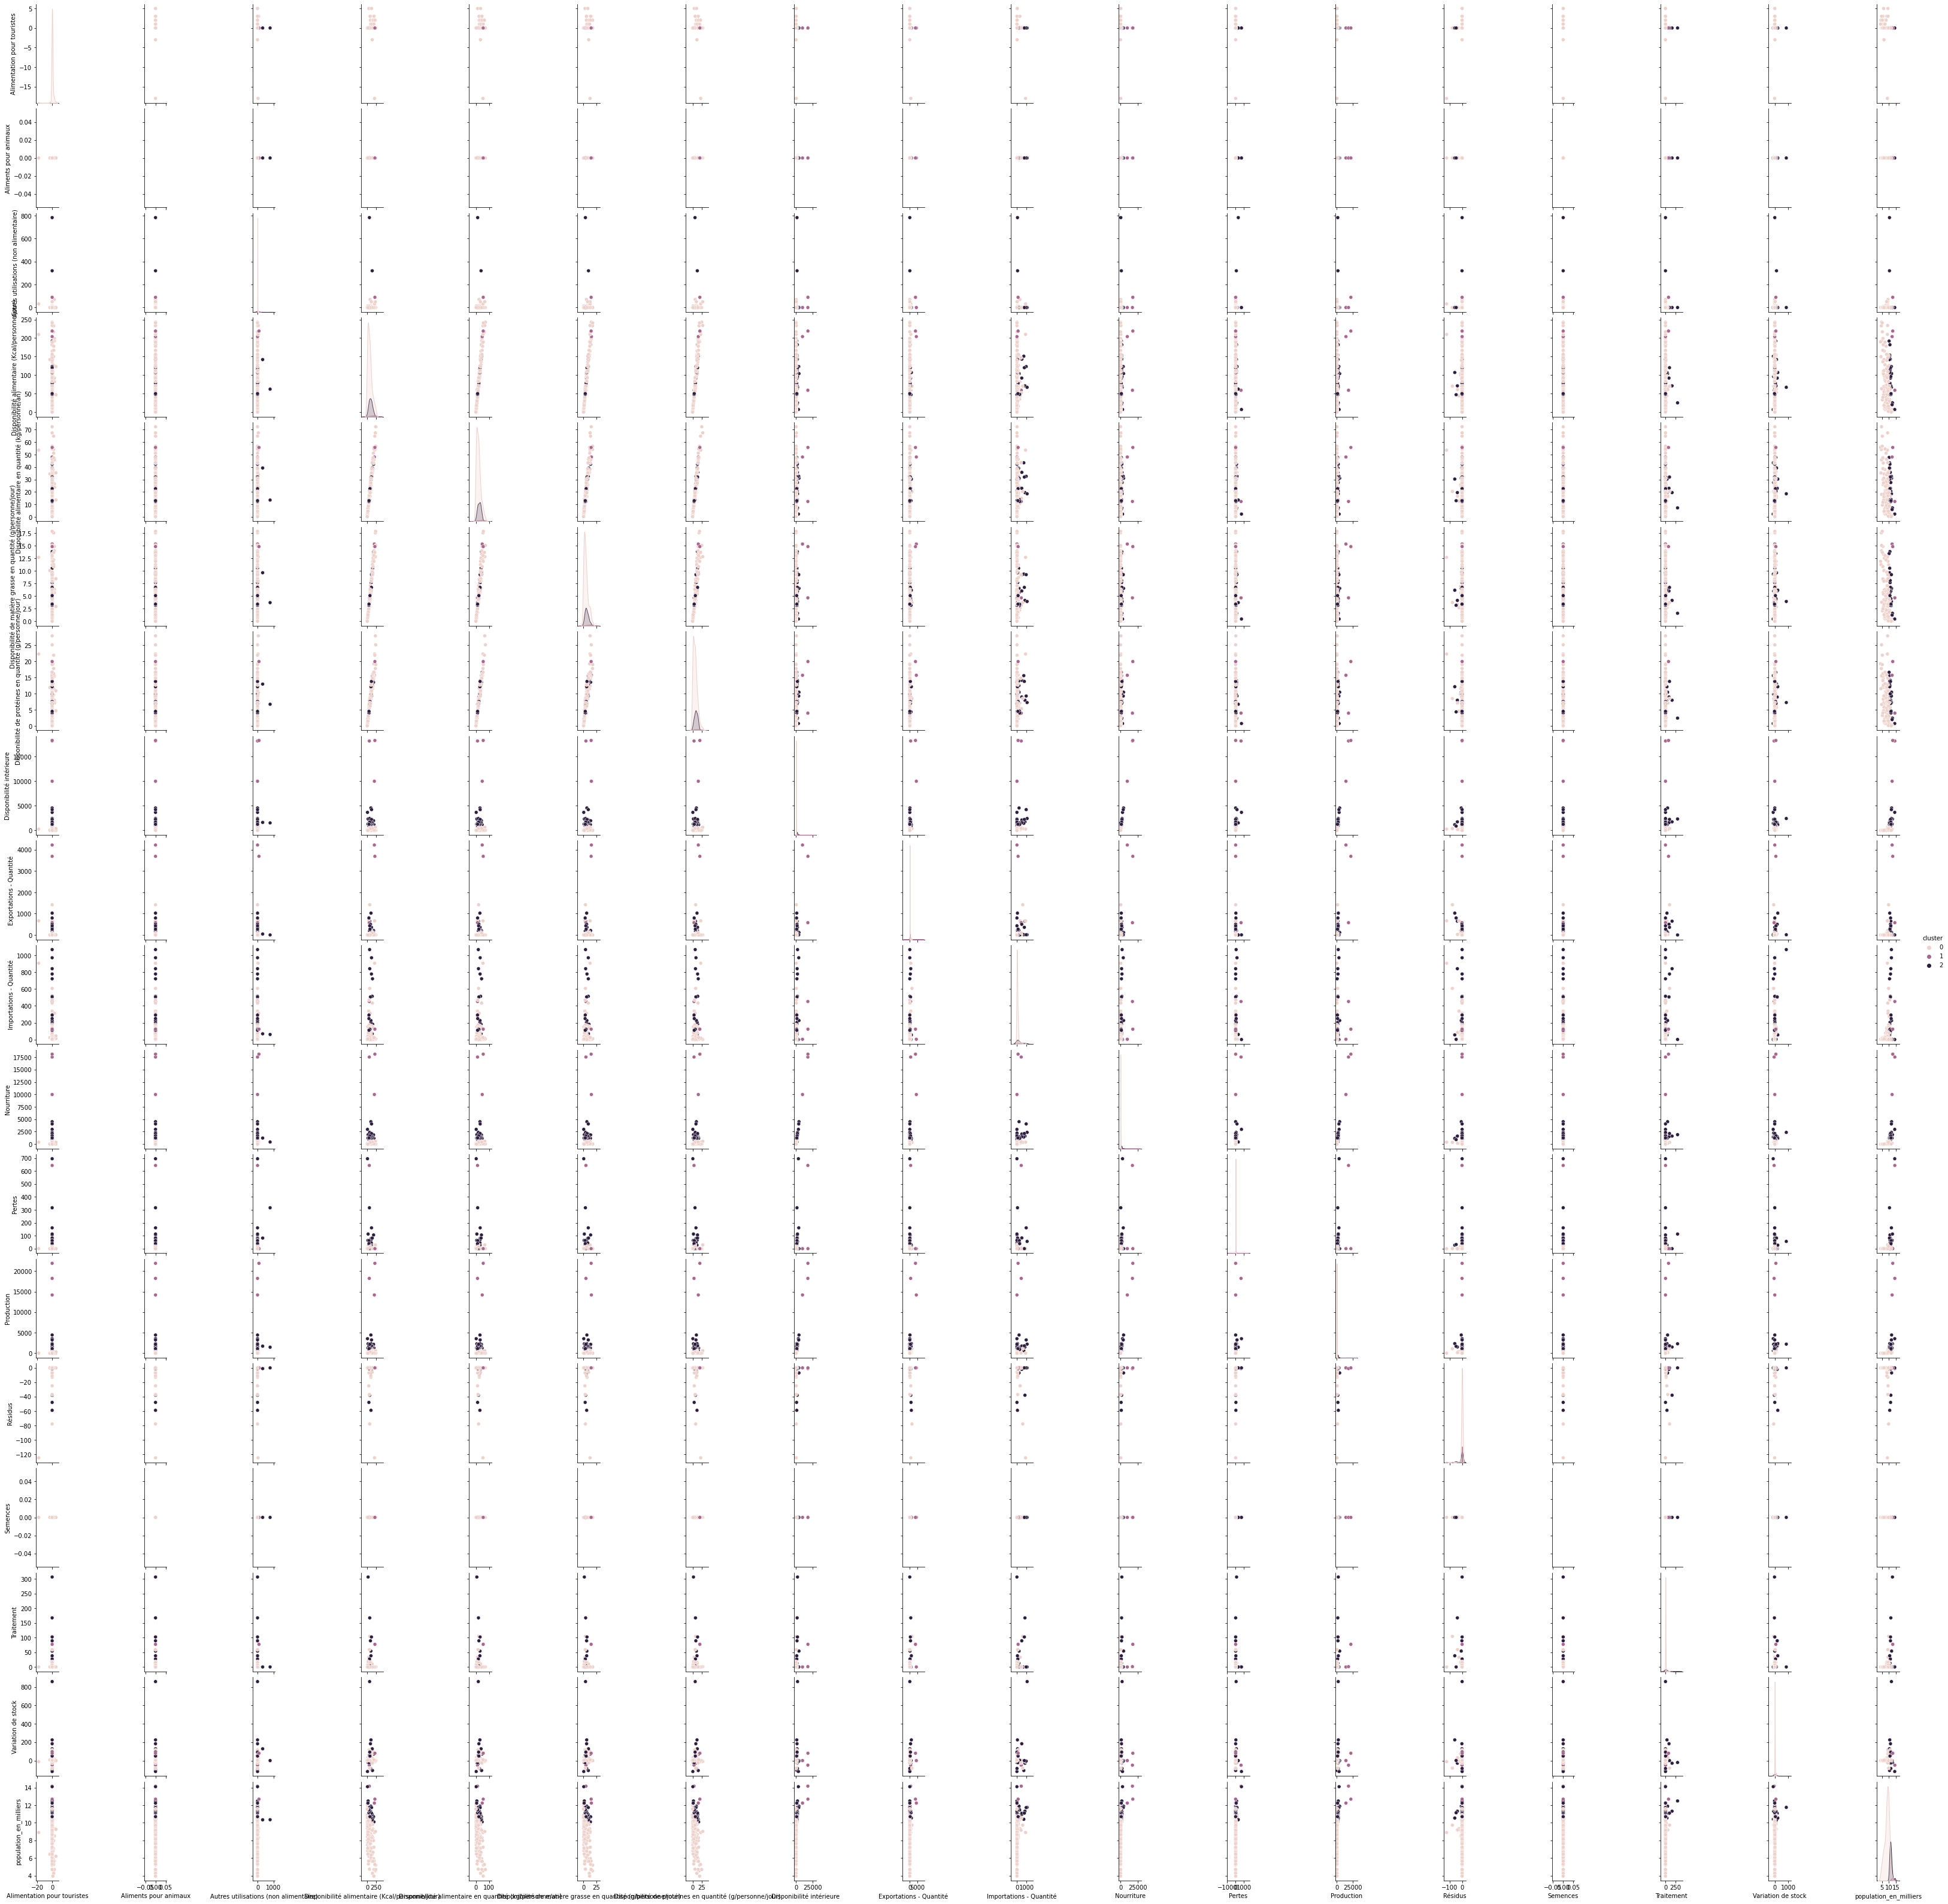

In [25]:
sns.pairplot(X_with_clusters, hue="cluster")

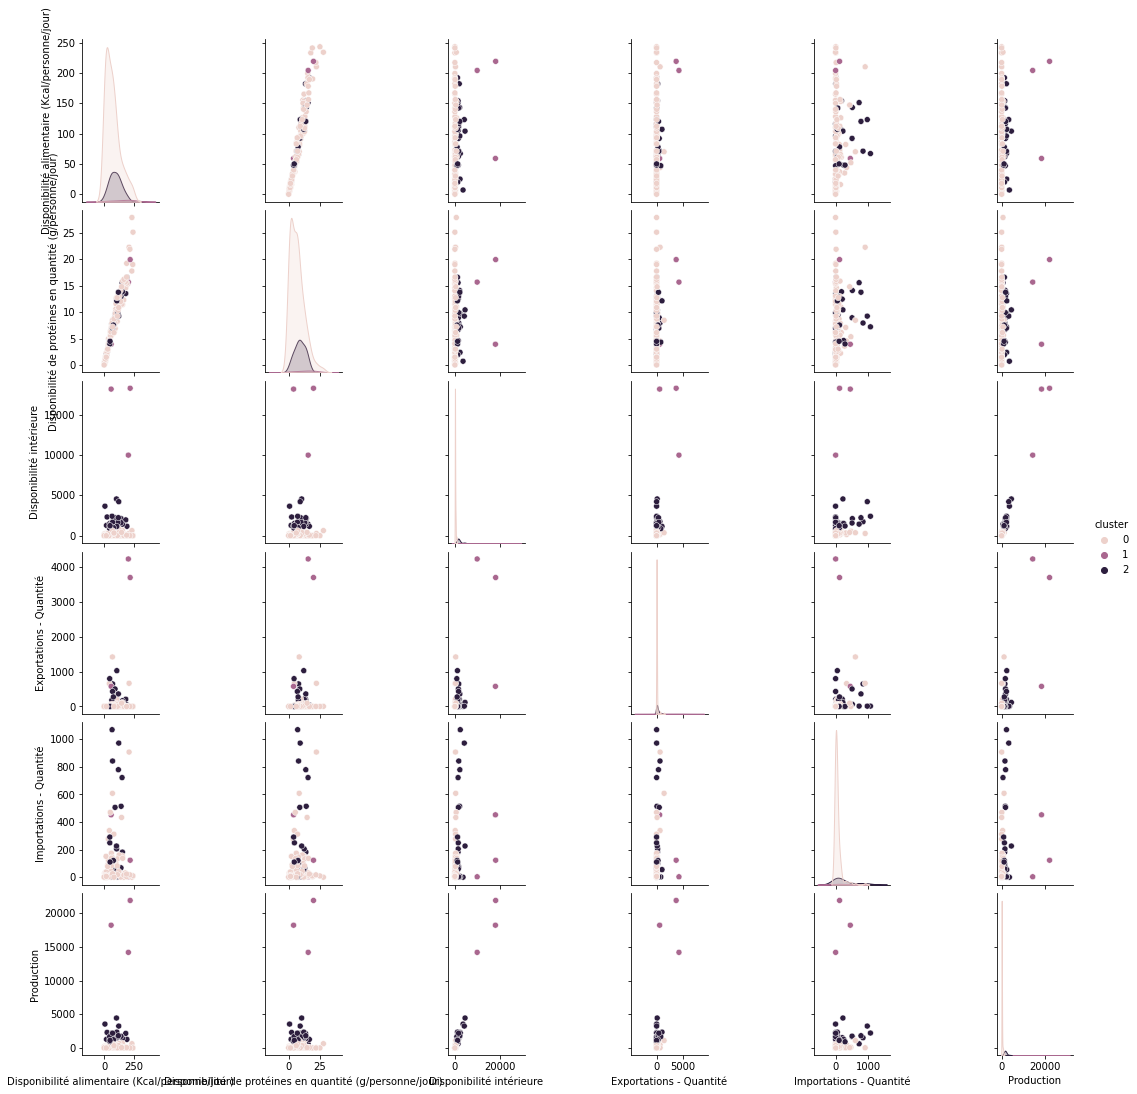

In [26]:
X_best_features_with_cluster = X_with_clusters.drop(columns=[
    "Alimentation pour touristes","Aliments pour animaux",
    "Autres utilisations (non alimentaire)",
    "Autres utilisations (non alimentaire)",
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de matière grasse en quantité (g/personne/jour)",
    "Nourriture","Pertes","Résidus","Semences","Traitement","Variation de stock",
    "population_en_milliers"])
sns.pairplot(X_best_features_with_cluster, hue="cluster")

---
---
---

# Observations :
## Après une petite inspection rapide on distingue facilement nos 3 clusters.
## On peut aussi se rendre compte de l'importance de la relativité Production/Importations sur le classement des pays dans chaque cluster.
## On distingue donc 3 clusters principaux avec des tendances spécifiques :
## Le cluster 1 : pays produisant peu ou pas produit "volaille", plutôt importateurs mais c'est le cluster avec en général les plus petits importateurs.
## Le cluster 2 : pays grossistes en production de produit "volaille", ils sont très gros producteurs et tous importateurs sauf le Brésil concentré sur l'exportation.
## Le cluster 3 : Pays producteurs de produits volaille, ils en importent cependant aussi. Ce cluster contient les plus gros importateurs et la moyenne des importation des pays de ce cluster est la plus grande.

---
---

# Comparaison des différentes méthodes de clustering :

# Nos méthodes de clustering convergent :
#### La CAH comme l'analyse KMEAN nous isolent un nombre de clusters similaires comme réellement révélateurs.
#### En étudiant plus en profondeur la composition des clusters on se rend compte que les regroupements sont similaires, 
#### (exemple de cluster similaire : Brésil, Chine Continental et États-Unis d'Amérique)
---

---
---
---

---

# Analyses en Composantes Principales :

## Objectif de l'ACP : Trouver k nouvelles variables combinaisons linéaires des p variables initiales qui synthétisent les variables initiales et font en sorte de perdre le moins d'informations que possible.
#### Très simplement, peut-on ignorer de l'information sans perdre en qualité de la complexité.

---

# 3.1 - Input data & Centrage-Réduction des valeurs (optionnel)

In [31]:
dispo_alim_complet = dispo_alim_complet.drop(columns=["cluster"])

In [32]:
# Input data 1 :
X = dispo_alim_complet
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [33]:
#Input data 2 :
# Input Data Manuel afin de conserver un DataFrame avec le nom des colonnes :
X = dispo_alim_complet

# Centrage manuelle :
temp = X.sub(X.mean()) # Soustraction de la moyenne de chaque colonne à chaque valeur : centrer les valeurs

# Réduction manuelle :
X = temp.div(temp.std()) # Division des valeurs du dataframe par l'écart-type de chaque colonne

# On remplace les valeurs manquantes par des zéros :
X = X.fillna(0)

In [39]:
X

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,population_en_milliers
zone,,,,,,,,,,,,,,,,,,
Afghanistan,-0.061605,0.0,-0.134956,-1.156933,-1.187115,-1.097316,-1.184176,-0.288313,-0.227885,-0.324259,-0.281785,-0.193415,-0.276809,0.204940,0.0,-0.231563,-0.180818,0.773023
Afrique du Sud,-0.061605,0.0,-0.134956,1.118715,0.964693,1.027208,1.235808,0.653994,-0.091116,2.273909,0.644944,0.838879,0.381993,0.204940,0.0,-0.231563,-0.180818,1.004244
Albanie,-0.061605,0.0,-0.134956,0.162283,-0.252943,0.360317,-0.164109,-0.292885,-0.227885,-0.276046,-0.285530,-0.218903,-0.282838,0.204940,0.0,-0.231563,-0.127590,-0.523864
Algérie,-0.061605,0.0,-0.134956,-0.876600,-0.881603,-0.818651,-0.929159,-0.187727,-0.227885,-0.468899,-0.183964,-0.053226,-0.177526,0.204940,0.0,-0.231563,-0.180818,0.840267
Allemagne,-0.061605,0.0,-0.134956,-0.068580,-0.057037,-0.185104,0.139058,0.480712,1.174546,4.031021,0.445557,-0.218903,0.320494,-2.642188,0.0,5.206059,-0.566718,1.194487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,-0.061605,0.0,-0.134956,1.184676,1.454772,1.027208,1.358858,-0.126004,-0.023817,1.839988,-0.114693,-0.218903,-0.268770,0.204940,0.0,-0.231563,-0.526797,0.085901
Équateur,-0.061605,0.0,-0.134956,0.129303,-0.067116,0.336500,-0.183725,-0.158466,-0.227885,-0.479613,-0.155881,-0.002249,-0.151399,0.204940,0.0,-0.231563,-0.194124,0.378088
États-Unis d'Amérique,-0.061605,0.0,1.226297,2.371970,2.223904,2.356226,2.273709,8.037001,7.787246,0.179304,8.164090,-0.218903,8.520352,0.204940,0.0,2.275604,0.883736,1.895745


# X_PCA : 1ère analyse PCA

In [40]:
pca = PCA()
X_pca = pca.fit_transform(X)
# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X.shape[1])]
X_pca = pd.DataFrame(X_pca, columns = component_names)

features = X.columns
features

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'population_en_milliers'],
      dtype='object')

In [49]:
# Correlation with Importations - Quantité :
X[features].corrwith(X["Importations - Quantité"])

Alimentation pour touristes                                     -0.321195
Aliments pour animaux                                                 NaN
Autres utilisations (non alimentaire)                            0.001710
Disponibilité alimentaire (Kcal/personne/jour)                   0.171294
Disponibilité alimentaire en quantité (kg/personne/an)           0.177544
Disponibilité de matière grasse en quantité (g/personne/jour)    0.137642
Disponibilité de protéines en quantité (g/personne/jour)         0.215426
Disponibilité intérieure                                         0.262413
Exportations - Quantité                                          0.159591
Importations - Quantité                                          1.000000
Nourriture                                                       0.261816
Pertes                                                           0.149166
Production                                                       0.194355
Résidus                               

In [51]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,-1.972396,1.521131,0.059871,-0.165065,-0.110541,-0.251698,0.062627,-0.436553,0.146168,0.063580,-0.030644,-0.062913,-0.015203,-0.003531,0.000030,0.000002,-3.426143e-18,-3.365201e-22
1,2.540248,-0.291910,0.475449,0.783465,0.866671,0.276109,-1.700637,-1.088008,-0.651836,-0.071152,0.200117,0.053504,-0.203809,-0.003011,0.000079,0.000041,4.577873e-16,-3.997157e-21
2,-0.519581,-0.630814,-0.203312,-0.060774,-0.184292,-0.174248,-0.021047,0.150019,-0.015845,-0.183663,0.101980,-0.441672,-0.197594,0.009037,0.000002,0.000070,-1.314877e-17,-1.334851e-21
3,-1.499799,1.267815,-0.086863,-0.067432,-0.153933,-0.229625,-0.023270,-0.442549,0.377197,0.134298,-0.070953,-0.059810,0.014114,0.000558,0.000018,0.000018,-1.951430e-19,-3.412302e-21
4,2.330622,1.994917,4.456626,-1.498838,0.419450,4.498478,-0.042892,-0.087354,-1.466437,0.002306,0.101025,-0.150273,-0.012482,-0.006502,-0.000127,-0.000147,-1.553606e-17,3.145716e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1.687665,-1.816565,0.596481,0.291365,0.417524,0.370698,-1.067056,-1.177701,-0.838981,-0.241398,0.325799,0.223465,0.122135,0.002201,-0.000289,0.000107,-1.271097e-17,1.002733e-21
166,-0.279354,-0.166332,-0.280295,0.081461,-0.191818,-0.119963,-0.191109,-0.337664,0.525044,0.114281,-0.009539,-0.371716,-0.033702,-0.003481,0.000039,0.000023,-4.580633e-18,-4.223977e-22
167,14.788105,6.203765,-3.012613,-3.524696,-1.037790,-1.256759,3.556226,-0.049186,-0.202007,-1.520894,-0.766052,0.198355,-0.000828,0.003181,0.000155,-0.000080,1.494317e-17,1.268895e-22
168,-2.079627,1.823947,0.078841,-0.159679,-0.081634,-0.240895,0.063180,-0.771991,0.466560,0.241592,-0.083902,-0.074847,-0.021751,-0.005277,-0.000080,0.000346,-4.291949e-18,-3.603091e-22


---

## Extraction de la matrice de corrélation des composantes aux clusters :

In [52]:
X_pca["cluster"] = y_cluster_predict_kmean
X_pca.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,cluster
0,-1.972396,1.521131,0.059871,-0.165065,-0.110541,-0.251698,0.062627,-0.436553,0.146168,0.063580,-0.030644,-0.062913,-0.015203,-0.003531,0.000030,0.000002,-3.426143e-18,-3.365201e-22,0
1,2.540248,-0.291910,0.475449,0.783465,0.866671,0.276109,-1.700637,-1.088008,-0.651836,-0.071152,0.200117,0.053504,-0.203809,-0.003011,0.000079,0.000041,4.577873e-16,-3.997157e-21,2


In [53]:
X_pca.groupby('cluster').corr().unstack().iloc[:,:]

PC1                                                              \
         PC1       PC2       PC3       PC4       PC5       PC6       PC7   
cluster                                                                    
0        1.0 -0.866238  0.250498  0.543990 -0.115617  0.181815 -0.504118   
1        1.0 -0.243409  0.053301 -0.615542  0.363541  0.230216  0.659820   
2        1.0 -0.383685  0.300935 -0.034088  0.282741  0.066328 -0.122577   

                                       ...      PC18                      \
              PC8       PC9      PC10  ...       PC9      PC10      PC11   
cluster                                ...                                 
0        0.092100  0.129406  0.154613  ...  0.060280  0.012385 -0.015907   
1       -0.335027  0.692952 -0.739334  ... -0.987846  0.181913 -0.421000   
2       -0.034681 -0.304111 -0.126912  ... -0.286437 -0.018269  0.125371   

                                                                          
             PC12      PC13      PC14      PC15      PC16      PC17 PC18  
cluster                                                                   
0       -0.001805 -0.013931  0.016314  0.013659  0.001690  0.389498  1.0  
1       -0.526165 -0.768882 -0.818693 -0.743237  0.614868 -0.989660  1.0  
2        0.028743  0.204503 -0.197347 -0.304138 -0.114948 -0.691874  1.0  

[3 rows x 324 columns]

In [54]:
X_pca.groupby

<bound method DataFrame.groupby of            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.972396  1.521131  0.059871 -0.165065 -0.110541 -0.251698  0.062627   
1     2.540248 -0.291910  0.475449  0.783465  0.866671  0.276109 -1.700637   
2    -0.519581 -0.630814 -0.203312 -0.060774 -0.184292 -0.174248 -0.021047   
3    -1.499799  1.267815 -0.086863 -0.067432 -0.153933 -0.229625 -0.023270   
4     2.330622  1.994917  4.456626 -1.498838  0.419450  4.498478 -0.042892   
..         ...       ...       ...       ...       ...       ...       ...   
165   1.687665 -1.816565  0.596481  0.291365  0.417524  0.370698 -1.067056   
166  -0.279354 -0.166332 -0.280295  0.081461 -0.191818 -0.119963 -0.191109   
167  14.788105  6.203765 -3.012613 -3.524696 -1.037790 -1.256759  3.556226   
168  -2.079627  1.823947  0.078841 -0.159679 -0.081634 -0.240895  0.063180   
169  -1.924664  0.399169 -0.251696 -0.284610 -0.438998 -0.386846  0.350028   

          PC8       PC9     

<AxesSubplot:xlabel='None-None', ylabel='cluster'>

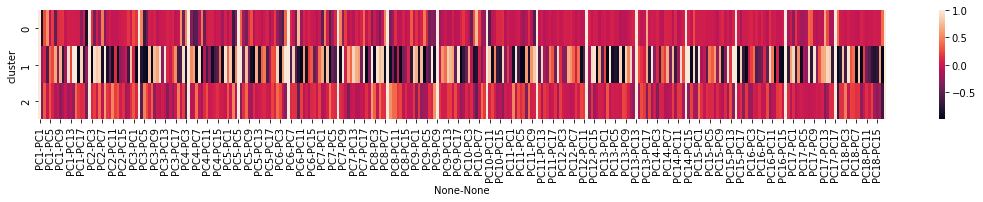

In [55]:
plt.figure(figsize=(19,2))
sns.heatmap(X_pca.groupby('cluster').corr().unstack())

<AxesSubplot:>

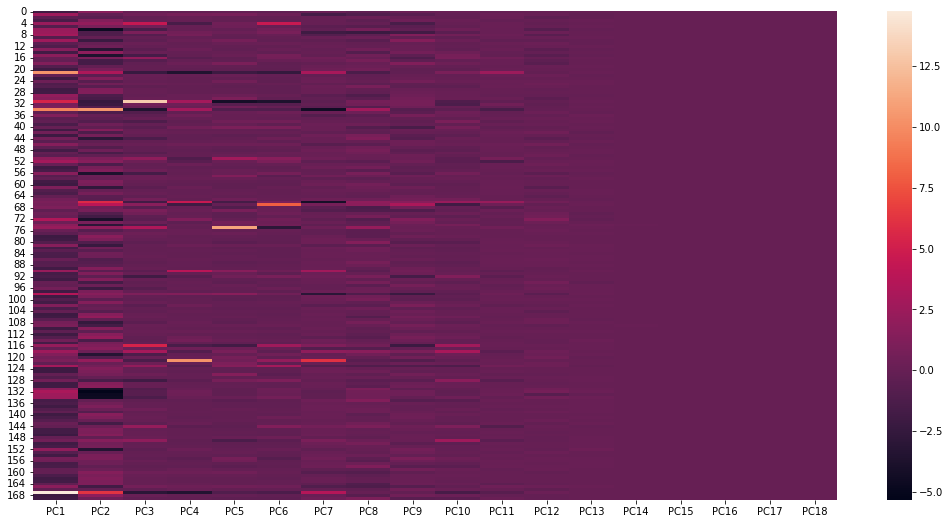

In [56]:
plt.figure(figsize=(18,9))
sns.heatmap(X_pca.drop(columns=["cluster"]))

# 3.2 - Réaliser l'ACP (numpy)

In [57]:
mypca = PCA(n_components = 18) # On évalue ici toutes les composantes

# Modèle d'ACP
mypca.fit(X)

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées :

print("Valeurs de variance :", mypca.singular_values_)
print("Pourcentages :", mypca.explained_variance_ratio_)

Valeurs de variance : [2.87000365e+01 2.47530110e+01 1.82646631e+01 1.43331341e+01
 1.39449587e+01 1.25509280e+01 1.17765020e+01 8.78604011e+00
 8.18235741e+00 7.63336278e+00 4.72335827e+00 3.46522598e+00
 1.07285232e+00 5.83797147e-02 2.57792841e-03 1.78651507e-03
 4.85285166e-16 4.15884063e-20]
Pourcentages : [3.04619857e-01 2.26594510e-01 1.23372011e-01 7.59758626e-02
 7.19163733e-02 5.82565803e-02 5.12892009e-02 2.85482621e-02
 2.47599752e-02 2.15489006e-02 8.25078158e-03 4.44075115e-03
 4.25670154e-04 1.26042570e-06 2.45773480e-09 1.18033879e-09
 8.70938210e-35 6.39643320e-43]


In [58]:
# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données.
# Les composantes sont triées par variance expliquée.

print(mypca.components_)

[[-5.76577694e-02 -0.00000000e+00  5.88874389e-02  3.34389181e-01
   3.24416449e-01  3.30805927e-01  3.24924944e-01  3.54058636e-01
   3.16005400e-01  1.78399622e-01  3.54835052e-01  1.35801217e-01
   3.58017511e-01 -1.03331289e-01 -0.00000000e+00  1.05088190e-01
   5.40438053e-02  8.32197089e-02]
 [-3.45141824e-02  1.38777878e-17  3.94736640e-02 -3.47744784e-01
  -3.56803336e-01 -3.36699531e-01 -3.48796244e-01  2.91771576e-01
   1.63581112e-01  7.85175259e-02  2.86254508e-01  2.54956953e-01
   2.81250088e-01  2.62563291e-03 -3.08148791e-33  1.29813704e-01
   1.16759083e-02  3.91017384e-01]
 [-5.35538999e-01 -1.11022302e-16 -5.37661965e-02 -3.14699786e-02
  -2.56308991e-02 -6.62650760e-02  2.41465175e-02 -1.52358249e-01
   2.52262995e-02  4.28800630e-01 -1.48600283e-01 -1.31803959e-01
  -1.57595133e-01 -5.92089460e-01 -0.00000000e+00  2.23165055e-01
   1.27711049e-01  1.22446484e-01]
 [-1.84104637e-01 -3.46944695e-17  6.83450638e-01  4.34081197e-02
   3.79854704e-02  3.50606995e-02  5.

In [59]:
# Résultats de l'ACP

data_sortie = mypca.fit_transform(X)
data_sortie

array([[-1.97239620e+00,  1.52113052e+00,  5.98708923e-02, ...,
         2.43961336e-06, -3.42614316e-18, -3.36520062e-22],
       [ 2.54024802e+00, -2.91910458e-01,  4.75449405e-01, ...,
         4.09936283e-05,  4.57787251e-16, -3.99715680e-21],
       [-5.19581106e-01, -6.30814171e-01, -2.03312460e-01, ...,
         7.04675936e-05, -1.31487714e-17, -1.33485071e-21],
       ...,
       [ 1.47881050e+01,  6.20376492e+00, -3.01261329e+00, ...,
        -8.00796710e-05,  1.49431743e-17,  1.26889492e-22],
       [-2.07962674e+00,  1.82394701e+00,  7.88414498e-02, ...,
         3.45510347e-04, -4.29194880e-18, -3.60309081e-22],
       [-1.92466361e+00,  3.99169414e-01, -2.51696377e-01, ...,
        -7.03804664e-06,  9.14316425e-18,  6.25764656e-22]])

In [55]:
# Bruit estimé lié à la covariance

print(mypca.noise_variance_)

0.0


# 3.3 - ACP et contrôle via diagramme de pareto :

In [56]:
# Initialiser et computer l'ACP :
pca = PCA()
X_pca = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

# Obtenir les informations de base :
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

# Affichage de la variance expliquée :
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(20))
print('-'*40)

PCA Overview
Total: 18 components
----------------------------------------
Mean explained variance: 0.056
----------------------------------------
    explained variance  cumulative
1         3.046199e-01    0.304620
2         2.265945e-01    0.531214
3         1.233720e-01    0.654586
4         7.597586e-02    0.730562
5         7.191637e-02    0.802479
6         5.825658e-02    0.860735
7         5.128920e-02    0.912024
8         2.854826e-02    0.940573
9         2.475998e-02    0.965333
10        2.154890e-02    0.986882
11        8.250782e-03    0.995132
12        4.440751e-03    0.999573
13        4.256702e-04    0.999999
14        1.260426e-06    1.000000
15        2.457735e-09    1.000000
16        1.180339e-09    1.000000
17        8.709382e-35    1.000000
18        6.396433e-43    1.000000
----------------------------------------


In [58]:
# df_explained_variance

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18']

---

## 10 à 11 composantes principales expliquent déjà 98,69% et 99,51% de la variance du jeu de données.
### Nous pouvons en déduire qu'au moins 6 composantes ne sont pas des composantes utiles dans l'explication de la variance de nos données.

---

Limit screen plot to number of component (0 for all) > 18


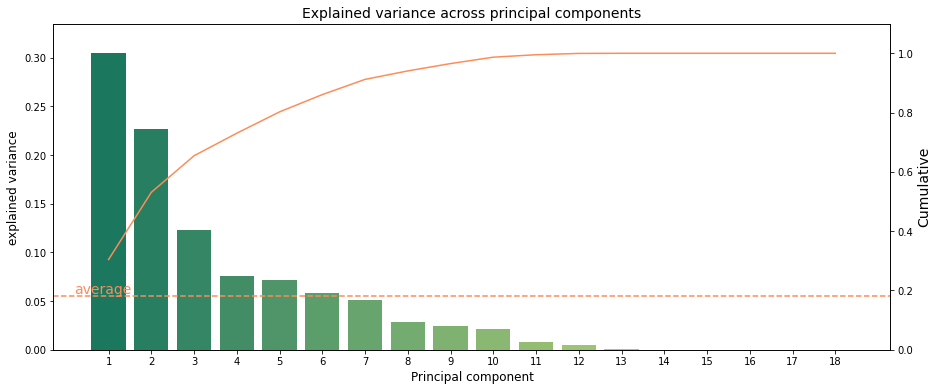

In [59]:
# Limiter le plot au nombre de composantes principales à analyser :
limit = int(input("Limit screen plot to number of component (0 for all) > "))
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components
df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]

# Affichages graphiques :
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)
ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')
ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') # plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) # label y axis
max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))
plt.show()

In [60]:
from matplotlib.ticker import PercentFormatter

def pareto(data) :
    y = list(data)
    x = range(len(data))
    ycum = np.cumsum(y)/sum(y)*100
    fig, ax = plt.subplots(figsize=(19,10))
    ax.set_title('Explication de la variance et Nbre de composantes prises en compte :', fontsize=14)
    ax.set_xlabel('Composantes principales', fontsize=12)
    ax.set_ylabel('Variance expliquée', fontsize=12)
    ax.bar(x,y, color="#336635")
    ax2 = ax.twinx()
    ax2.plot(x,ycum, color="C1", marker="D", ms=7)
    
    ax2.axhline(y=80,color="orange", ls='--')
    ax2.axhline(y=99,color="r", ls='--')
    ax2.axhline(y=95,color="r", ls='--')
    ax2.text(.8, 82, "Zone de Pareto", color='#fc8d59', fontsize=14) # label y axis
    ax2.text(.8, 96, "Machine Learning : Zone de Précision Maximale", color='r', fontsize=14) # label y axis
    
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")
    plt.ylim(0,110)
    plt.show()

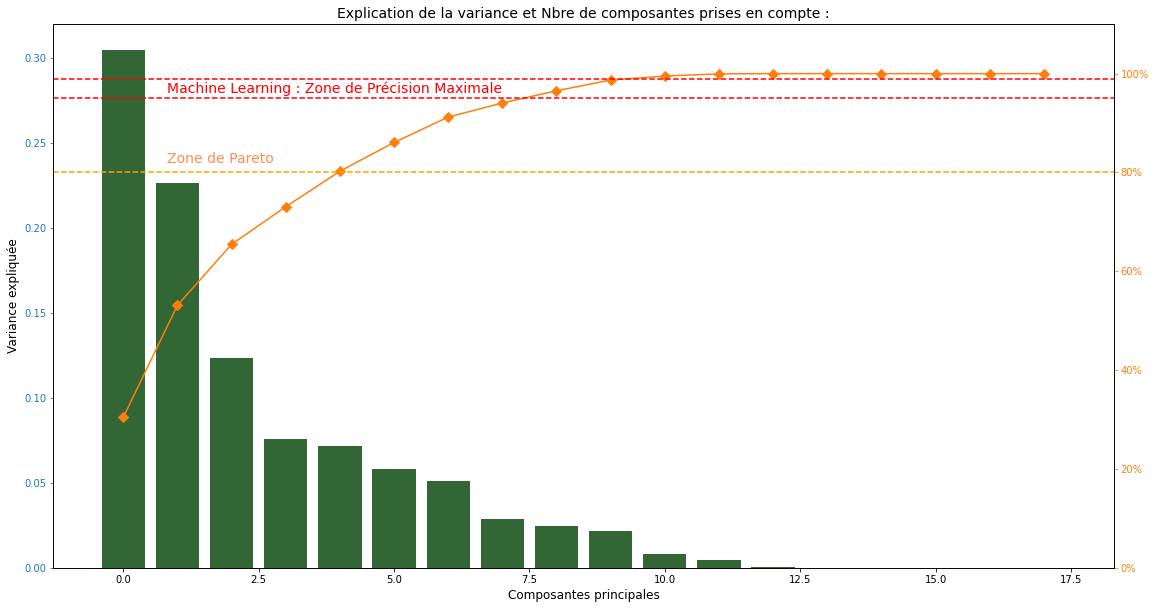

In [61]:
pareto(mypca.explained_variance_ratio_)

## En général en Machine Learning nous aimons pouvoir capter entre 95% et 99% de la variance.
## J'ai tracé deux lignes violettes sur le schéma précédent afin de signaler notre zone de recherche optimale.
## A partir du dépassement de la ligne rouge nos composantes expliquent plus de 80% de la variance dans le jeu de données.
---
# Avec ces informations nous pouvons construire plusieurs types de stratégies aussi bien pour du Machine learning de haute précision que du focus concentré sur les effets leviers de type Pareto (20% d'actions essentielles qui déclenchent 80% du CA) bref un panel de choix complémentaires s'offrent à nous.

---

---

# Approfondissement d'analyse PCA sur les 10 composantes principales :

In [99]:
train_features = X

model = PCA(n_components=10).fit(X_scaled)
X_pc = model.transform(X_scaled)
X_pc

array([[-1.97822308,  1.52562427,  0.06004776, ..., -0.43784248,
         0.14659994,  0.06376787],
       [ 2.54775247, -0.29277282,  0.47685398, ..., -1.09122175,
        -0.65376173, -0.07136197],
       [-0.52111606, -0.63267773, -0.20391309, ...,  0.15046265,
        -0.01589147, -0.18420553],
       ...,
       [14.83179225,  6.22209218, -3.0215132 , ..., -0.0493312 ,
        -0.20260366, -1.52538695],
       [-2.08577041,  1.82933535,  0.07907436, ..., -0.77427146,
         0.46793787,  0.24230619],
       [-1.93034948,  0.40034865, -0.25243994, ...,  0.96446714,
        -0.63393285, -0.49456312]])

In [100]:
# number of components
n_pcs= model.components_.shape[0]
n_pcs

10

In [101]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
most_important

[12, 17, 13, 2, 16, 15, 2, 17, 9, 13]

In [102]:
initial_feature_names = dispo_alim_complet.columns
initial_feature_names

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'population_en_milliers'],
      dtype='object')

In [103]:
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['Production',
 'population_en_milliers',
 'Résidus',
 'Autres utilisations (non alimentaire)',
 'Variation de stock',
 'Traitement',
 'Autres utilisations (non alimentaire)',
 'population_en_milliers',
 'Importations - Quantité',
 'Résidus']

In [104]:
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
dic

{'PC0': 'Production',
 'PC1': 'population_en_milliers',
 'PC2': 'Résidus',
 'PC3': 'Autres utilisations (non alimentaire)',
 'PC4': 'Variation de stock',
 'PC5': 'Traitement',
 'PC6': 'Autres utilisations (non alimentaire)',
 'PC7': 'population_en_milliers',
 'PC8': 'Importations - Quantité',
 'PC9': 'Résidus'}

In [105]:
# build the dataframe
df = pd.DataFrame(dic.items())
df.head(3)

,0,1
0,PC0,Production
1,PC1,population_en_milliers
2,PC2,Résidus


In [106]:
# Contrôle visuel des rapports variationnels :
X_pc.plot(figsize=(19,5))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [107]:
X_pc = pd.DataFrame(X_pc)
X_pc = X_pc.rename(columns= {
                      0: dic['PC0'],
                      1: dic['PC1'],
                      2: dic['PC2'],
                      3: dic['PC3'], 
                      4: dic['PC4'], 
                      5: dic['PC5'], 
                      6: dic['PC6'], 
                      7: dic['PC7'], 
                      8: dic['PC8'], 
                      9: dic['PC9'],  })

In [108]:
X_pc.head(5)

,Production,population_en_milliers,Résidus,Autres utilisations (non alimentaire),Variation de stock,Traitement,Autres utilisations (non alimentaire),population_en_milliers,Importations - Quantité,Résidus
0,-1.978223,1.525624,0.060048,-0.165553,-0.110867,-0.252441,0.062812,-0.437842,0.146600,0.063768
1,2.547752,-0.292773,0.476854,0.785779,0.869231,0.276925,-1.705661,-1.091222,-0.653762,-0.071362
2,-0.521116,-0.632678,-0.203913,-0.060953,-0.184837,-0.174762,-0.021109,0.150463,-0.015891,-0.184206
3,-1.504230,1.271560,-0.087120,-0.067631,-0.154388,-0.230303,-0.023338,-0.443856,0.378312,0.134695
4,2.337507,2.000810,4.469792,-1.503266,0.420689,4.511768,-0.043019,-0.087612,-1.470770,0.002312


In [109]:
model.components_.shape

(10, 18)

In [110]:
np.transpose(model.components_).shape
#score=  pca.fit_transform(x)[:, components]

(18, 10)

# Fonction de visualisation Bi-Plot pour ACP :

In [121]:
# Librairies spécifiques pour cercle des corrélations :
from scipy.spatial import ConvexHull
import matplotlib as mpl
import matplotlib.cm as cm

def biplot(pca = [], x = None, y = None,
           components = [0,1,2,3,4,5,6,7,8,9],
           score = None, coeff = None, coeff_labels = None,
           score_labels = None, circle = 'T', bigdata = 1000, cat = None, cmap = "viridis",
           density = True):

    if isinstance(pca, PCA) == True :

        coeff = np.transpose(pca.components_[components, :])

        score=  pca.fit_transform(x)[:, components]

        if isinstance(x, pd.DataFrame) == True :

            coeff_labels = list(x.columns)

    if score is not None : x = score

    if x.shape[1] > 1 :

        xs = x[:, 0]

        ys = x[:, 1]

    else :

        xs = x

        ys = y

    if (len(xs) != len(ys)) : print("Warning ! x et y n'ont pas la même taille !")

    scalex = 1.0 / (xs.max() - xs.min())

    scaley = 1.0 / (ys.max() - ys.min())

    #x_c = xs * scalex
    #y_c = ys * scaley

    temp = (xs - xs.min())

    x_c = temp / temp.max() * 2 - 1

    temp = (ys - ys.min())

    y_c = temp / temp.max() * 2 - 1

    data = pd.DataFrame({"x_c" : x_c, "y_c" : y_c})

    print("Attention : pour des facilités d'affichage, les données sont centrées-réduites")

    if cat is None : cat = [0]*len(xs)

    elif len(pd.Series(cat)) == 1 : cat = list(pd.Series(cat)) * len(xs)

    elif len(pd.Series(cat)) != len(xs) : print("Warning ! Nombre anormal de catégories !")

    cat = pd.Series(cat).astype("category")

    fig = plt.figure(figsize = (16, 16), facecolor = 'w') 

    ax = fig.add_subplot(111)

    # Affichage des points

    if (len(xs) < bigdata) :   

        ax.scatter(x_c, y_c, c = cat.cat.codes, cmap = cmap)

        if density == True : print("Warning ! Le mode density actif n'apparait que si BigData est paramétré.")

    # Affichage des nappes convexes (BigData)

    else :

        #color

        norm = mpl.colors.Normalize(vmin = 0, vmax = (len(np.unique(cat.cat.codes)))) #-(len(np.unique(c)))

        cmap = cmap

        m = cm.ScalarMappable(norm = norm, cmap = cmap)

        if density == True :

            sns.set_style("white")

            sns.kdeplot(x = "x_c", y = "y_c", data = data)

            if len(np.unique(cat)) <= 1 :

                sns.kdeplot(x = "x_c", y = "y_c", data = data, cmap = "Blues", shade = True, thresh = 0)

            else :

                for i in np.unique(cat) :

                    color_temp = m.to_rgba(i)

                    sns.kdeplot(x = "x_c", y = "y_c", data = data[cat==i], color = color_temp,

                                shade = True, thresh = 0.25, alpha = 0.25)     

        for cat_temp in cat.cat.codes.unique() :

            x_c_temp = [x_c[i] for i in range(len(x_c)) if (cat.cat.codes[i] == cat_temp)]

            y_c_temp = [y_c[i] for i in range(len(y_c)) if (cat.cat.codes[i] == cat_temp)]

            points = [ [ None ] * len(x_c_temp) ] * 2

            points = np.array(points)

            points = points.reshape(len(x_c_temp), 2)

            points[:, 0] = x_c_temp

            points[:, 1] = y_c_temp

            hull = ConvexHull(points)

            temp = 0

            for simplex in hull.simplices:

                color_temp = m.to_rgba(cat_temp)

                plt.plot(points[simplex, 0], points[simplex, 1], color = color_temp) #, linestyle='dashed')#linewidth=2,color=cat)

                if (temp == 0) :

                     plt.xlim(-1, 1)

                     plt.ylim(-1, 1)

                     temp = temp + 1

    if coeff is not None :

        if (circle == 'T') :

            x_circle = np.linspace(-1, 1, 100)

            y_circle = np.linspace(-1, 1, 100)

            X, Y = np.meshgrid(x_circle, y_circle)

            F = X**2 + Y**2 - 1.0

            #fig, ax = plt.subplots()

            plt.contour(X, Y, F, [0])

        n = coeff.shape[0]

        for i in range(n):

            plt.arrow(0, 0, coeff[i, 0], coeff[i, 1],color = 'r',alpha = 0.5,

                      head_width = 0.05, head_length = 0.05)

            if coeff_labels is None:

                plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color = 'g',
                         ha = 'center', va = 'center')

            else:

                plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, coeff_labels[i], color = 'g', ha = 'center',
                         va = 'center')

        if score_labels is not None :

            for i in range(len(score_labels)) :

                temp_x = xs[i] * scalex

                temp_y = ys[i] * scaley

                plt.text(temp_x, temp_y,list(score_labels)[i])

    plt.xlim(-1.2,1.2)

    plt.ylim(-1.2,1.2)

    plt.xlabel("PC{}".format(1))

    plt.ylabel("PC{}".format(2))

    plt.grid(linestyle='--')

    plt.show()

In [122]:
model.explained_variance_ratio_

array([0.30461986, 0.22659451, 0.12337201, 0.07597586, 0.07191637,
       0.05825658, 0.0512892 , 0.02854826, 0.02475998, 0.0215489 ])

---

In [123]:
model.explained_variance_ # composantes triées par variance expliquée

array([4.90275746, 3.6469649 , 1.98563236, 1.22280678, 1.15747062,
       0.9376207 , 0.825483  , 0.45947499, 0.39850374, 0.34682254])

---

In [135]:
from sklearn.decomposition import PCA

mypca = PCA(n_components=10) # On paramètre ici pour ne garder que 3 composantes

# Modèle d'ACP

mypca.fit(X)

# Pourcentage de la variance expliquée par chacune des composantes sélectionnées.

print(mypca.singular_values_) # Valeurs de variance

print(mypca.explained_variance_ratio_) #  Pourcentages

# Axes principaux dans l'espace des caractéristiques, représentant les directions de la variance maximale dans les données. Les composantes sont triées par variance expliquée.

print(mypca.components_) # 

# Résultats de l'ACP

data_sortie_10= mypca.fit_transform(X)

# Bruit estimé lié à la covariance

print(mypca.noise_variance_)

[28.70003646 24.75301104 18.26466308 14.33313408 13.94495871 12.55092797
 11.776502    8.78604011  8.18235741  7.63336278]
[0.30461986 0.22659451 0.12337201 0.07597586 0.07191637 0.05825658
 0.0512892  0.02854826 0.02475998 0.0215489 ]
[[-5.76577694e-02 -0.00000000e+00  5.88874389e-02  3.34389181e-01
   3.24416449e-01  3.30805927e-01  3.24924944e-01  3.54058636e-01
   3.16005400e-01  1.78399622e-01  3.54835052e-01  1.35801217e-01
   3.58017511e-01 -1.03331289e-01 -0.00000000e+00  1.05088190e-01
   5.40438053e-02  8.32197089e-02]
 [-3.45141824e-02  1.38777878e-17  3.94736640e-02 -3.47744784e-01
  -3.56803336e-01 -3.36699531e-01 -3.48796244e-01  2.91771576e-01
   1.63581112e-01  7.85175259e-02  2.86254508e-01  2.54956953e-01
   2.81250088e-01  2.62563291e-03 -3.08148791e-33  1.29813704e-01
   1.16759083e-02  3.91017384e-01]
 [-5.35538999e-01 -1.11022302e-16 -5.37661965e-02 -3.14699786e-02
  -2.56308991e-02 -6.62650760e-02  2.41465175e-02 -1.52358249e-01
   2.52262995e-02  4.28800630e-01 

In [136]:
X

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,population_en_milliers
zone,,,,,,,,,,,,,,,,,,
Afghanistan,-0.061605,0.0,-0.134956,-1.156933,-1.187115,-1.097316,-1.184176,-0.288313,-0.227885,-0.324259,-0.281785,-0.193415,-0.276809,0.204940,0.0,-0.231563,-0.180818,0.773023
Afrique du Sud,-0.061605,0.0,-0.134956,1.118715,0.964693,1.027208,1.235808,0.653994,-0.091116,2.273909,0.644944,0.838879,0.381993,0.204940,0.0,-0.231563,-0.180818,1.004244
Albanie,-0.061605,0.0,-0.134956,0.162283,-0.252943,0.360317,-0.164109,-0.292885,-0.227885,-0.276046,-0.285530,-0.218903,-0.282838,0.204940,0.0,-0.231563,-0.127590,-0.523864
Algérie,-0.061605,0.0,-0.134956,-0.876600,-0.881603,-0.818651,-0.929159,-0.187727,-0.227885,-0.468899,-0.183964,-0.053226,-0.177526,0.204940,0.0,-0.231563,-0.180818,0.840267
Allemagne,-0.061605,0.0,-0.134956,-0.068580,-0.057037,-0.185104,0.139058,0.480712,1.174546,4.031021,0.445557,-0.218903,0.320494,-2.642188,0.0,5.206059,-0.566718,1.194487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,-0.061605,0.0,-0.134956,1.184676,1.454772,1.027208,1.358858,-0.126004,-0.023817,1.839988,-0.114693,-0.218903,-0.268770,0.204940,0.0,-0.231563,-0.526797,0.085901
Équateur,-0.061605,0.0,-0.134956,0.129303,-0.067116,0.336500,-0.183725,-0.158466,-0.227885,-0.479613,-0.155881,-0.002249,-0.151399,0.204940,0.0,-0.231563,-0.194124,0.378088
États-Unis d'Amérique,-0.061605,0.0,1.226297,2.371970,2.223904,2.356226,2.273709,8.037001,7.787246,0.179304,8.164090,-0.218903,8.520352,0.204940,0.0,2.275604,0.883736,1.895745


In [137]:
data_sortie_10_df = pd.DataFrame(data_sortie_10)
data_sortie_10_df = data_sortie_10_df.rename(columns= {
                      0: dic['PC0'],
                      1: dic['PC1'],
                      2: dic['PC2'],
                      3: dic['PC3'], 
                      4: dic['PC4'], 
                      5: dic['PC5'], 
                      6: dic['PC6'], 
                      7: dic['PC7'], 
                      8: dic['PC8'], 
                      9: dic['PC9'],  })

In [138]:
data_sortie_10_df

,Production,population_en_milliers,Résidus,Autres utilisations (non alimentaire),Variation de stock,Traitement,Autres utilisations (non alimentaire),population_en_milliers,Importations - Quantité,Résidus
0,-1.972396,1.521131,0.059871,-0.165065,-0.110541,-0.251698,0.062627,-0.436553,0.146168,0.063580
1,2.540248,-0.291910,0.475449,0.783465,0.866671,0.276109,-1.700637,-1.088008,-0.651836,-0.071152
2,-0.519581,-0.630814,-0.203312,-0.060774,-0.184292,-0.174248,-0.021047,0.150019,-0.015845,-0.183663
3,-1.499799,1.267815,-0.086863,-0.067432,-0.153933,-0.229625,-0.023270,-0.442549,0.377197,0.134298
4,2.330622,1.994917,4.456626,-1.498838,0.419450,4.498478,-0.042892,-0.087354,-1.466437,0.002306
...,...,...,...,...,...,...,...,...,...,...
165,1.687665,-1.816565,0.596481,0.291365,0.417524,0.370698,-1.067056,-1.177701,-0.838981,-0.241398
166,-0.279354,-0.166332,-0.280295,0.081461,-0.191818,-0.119963,-0.191109,-0.337664,0.525044,0.114281
167,14.788105,6.203765,-3.012613,-3.524696,-1.037790,-1.256759,3.556226,-0.049186,-0.202007,-1.520894
168,-2.079627,1.823947,0.078841,-0.159679,-0.081634,-0.240895,0.063180,-0.771991,0.466560,0.241592


In [139]:
X = pd.DataFrame(X)

---

# Projection d'un bi-plot sur les 10 composantes principales :

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


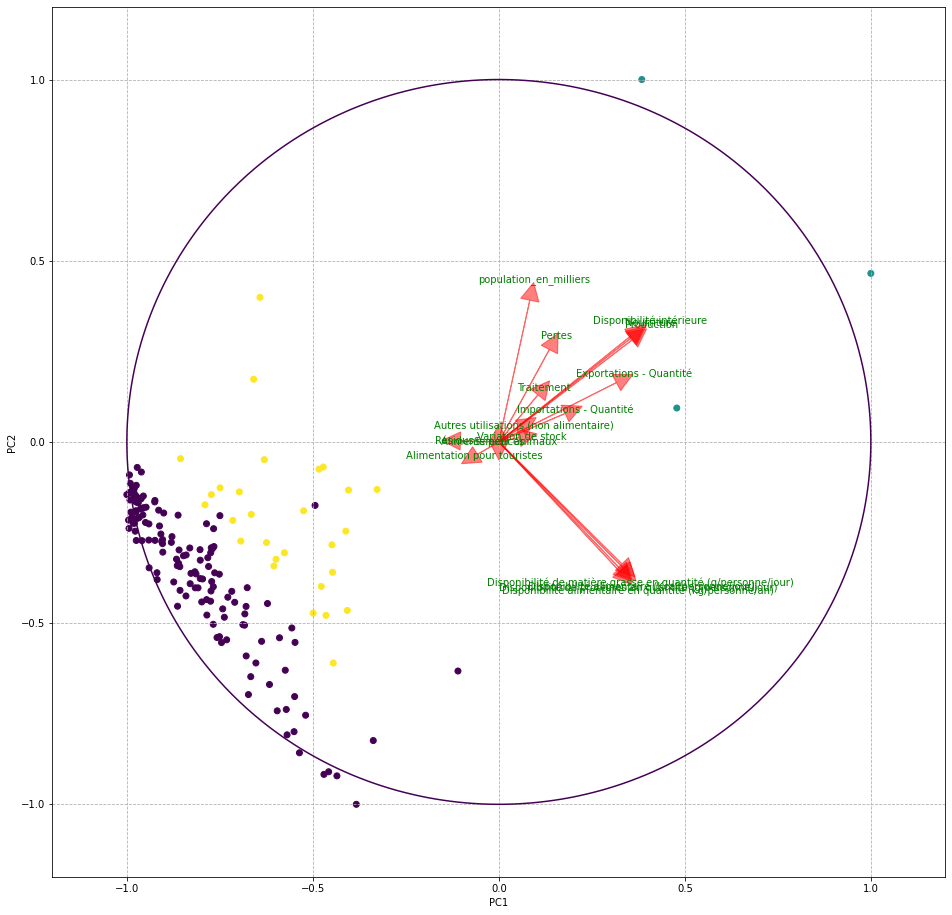

In [130]:
biplot(mypca,
       x=X,
       cat=y_cluster_predict_kmean,
       components=[0,1,2,3,4,5,6,7,8,9],
       coeff_labels = list(X.columns),
      )

plt.show()

## Autres analyses Bi-plot :

Attention : pour des facilités d'affichage, les données sont centrées-réduites
Warning ! Le mode density actif n'apparait que si BigData est paramétré.


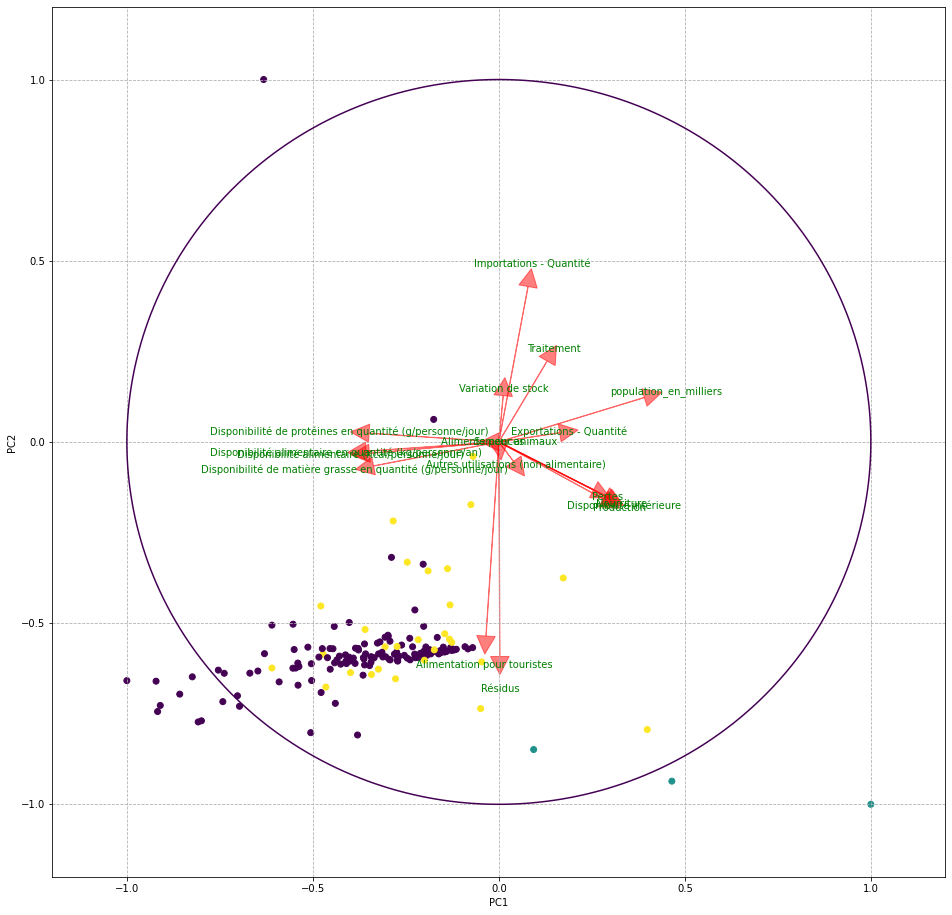

In [147]:
biplot(pca = model,
       x = X,
       cat = y_cluster_predict_kmean,
       components = [1,2], # Visualisation des composantes 9 et 12 à titre d'exemple
       #cmap = "Paired",
      )
plt.show()

# Les variables Production et population_en_milliers ont un poids extrême dans la classification synthétique de nos données.

---

## Analyse avec nos 10 composantes principales et visualisation des clusters :

In [148]:
X_pc.shape

(170, 10)

In [149]:
X_pc = np.array(X_pc)

In [150]:
model.components_[0:10, :].shape

(10, 18)

In [151]:
data_sortie[:, 0:10].shape

(170, 10)

Attention : pour des facilités d'affichage, les données sont centrées-réduites


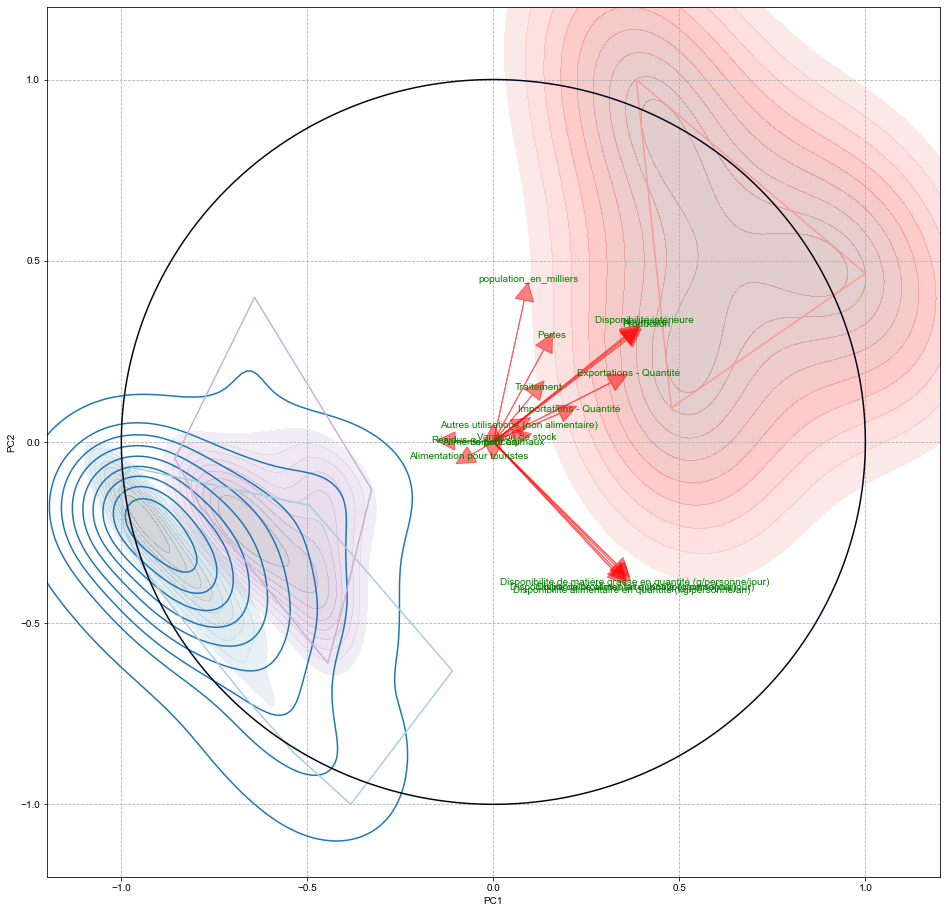

In [152]:
biplot(score = data_sortie[:, 0:10],

    coeff=np.transpose(mypca.components_[0:10, :]), # de forme : pca.components_[components, :]
       cat=y_cluster_predict_kmean,
       bigdata = 100,
       coeff_labels = list(X.columns),
       density= True,
       cmap = "Paired")

plt.show()

In [290]:
############### DEFINE PARAMS
top_k = 10
#select data based on percentile (top_q) or top-k features
top_q = .50
top_pc = 10
###############

# PCA factor loadings
df_c = pd.DataFrame(model.components_).T

print("Factor Loadings for the 1. component \n(explains {0:.2f} of the variance)".format(df_explained_variance.iloc[0,0]))
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

Factor Loadings for the 1. component 
(explains 0.30 of the variance)

Top 10 highest
----------------------------------------
12    0.358018
10    0.354835
7     0.354059
3     0.334389
5     0.330806
6     0.324925
4     0.324416
8     0.316005
9     0.178400
11    0.135801
Name: 0, dtype: float64 

Top 10 lowest
----------------------------------------
13   -0.103331
0    -0.057658
1    -0.000000
14   -0.000000
16    0.054044
2     0.058887
17    0.083220
15    0.105088
11    0.135801
9     0.178400
Name: 0, dtype: float64


In [295]:
df_c.index = X.columns

In [303]:
df_c.iloc[:,0]

Alimentation pour touristes                                     -0.057658
Aliments pour animaux                                           -0.000000
Autres utilisations (non alimentaire)                            0.058887
Disponibilité alimentaire (Kcal/personne/jour)                   0.334389
Disponibilité alimentaire en quantité (kg/personne/an)           0.324416
Disponibilité de matière grasse en quantité (g/personne/jour)    0.330806
Disponibilité de protéines en quantité (g/personne/jour)         0.324925
Disponibilité intérieure                                         0.354059
Exportations - Quantité                                          0.316005
Importations - Quantité                                          0.178400
Nourriture                                                       0.354835
Pertes                                                           0.135801
Production                                                       0.358018
Résidus                               

In [306]:
df_c

,0,1,2,3,4,5,6,7,8,9
Alimentation pour touristes,-0.057658,-3.451418e-02,-5.355390e-01,-1.841046e-01,2.781900e-01,3.642808e-01,3.122699e-02,-2.359626e-02,-3.514150e-01,5.514577e-01
Aliments pour animaux,-0.000000,1.387779e-17,-1.110223e-16,-3.469447e-17,-1.387779e-17,-5.551115e-17,-1.994932e-17,-3.122502e-17,-1.110223e-16,-0.000000e+00
Autres utilisations (non alimentaire),0.058887,3.947366e-02,-5.376620e-02,6.834506e-01,5.509770e-02,1.543860e-01,6.566992e-01,-1.491546e-01,-1.471918e-01,-1.125212e-01
Disponibilité alimentaire (Kcal/personne/jour),0.334389,-3.477448e-01,-3.146998e-02,4.340812e-02,1.318817e-02,3.476165e-02,-5.337395e-02,-6.002346e-02,9.936332e-02,2.895462e-02
Disponibilité alimentaire en quantité (kg/personne/an),0.324416,-3.568033e-01,-2.563090e-02,3.798547e-02,2.291552e-02,5.013162e-02,-6.706056e-02,-8.221114e-02,8.322991e-02,3.195604e-02
Disponibilité de matière grasse en quantité (g/personne/jour),0.330806,-3.366995e-01,-6.626508e-02,3.506070e-02,8.485116e-03,2.076998e-02,-5.843731e-02,-5.266904e-02,1.071899e-01,4.627386e-02
Disponibilité de protéines en quantité (g/personne/jour),0.324925,-3.487962e-01,2.414652e-02,5.471068e-02,1.929298e-02,5.523391e-02,-4.173731e-02,-6.930913e-02,8.351880e-02,4.194583e-03
Disponibilité intérieure,0.354059,2.917716e-01,-1.523582e-01,-3.329212e-02,-3.135606e-02,-7.690687e-02,-5.052793e-02,8.987163e-02,-6.396659e-02,-1.632451e-01
Exportations - Quantité,0.316005,1.635811e-01,2.522630e-02,-3.177903e-01,-1.756915e-01,-1.470938e-01,4.245630e-01,-9.087667e-02,-1.452680e-01,2.448011e-01
Importations - Quantité,0.178400,7.851753e-02,4.288006e-01,7.278099e-02,3.712914e-01,1.086283e-01,-3.180000e-01,-2.071532e-01,-6.549924e-01,-1.526759e-01


In [311]:
df_c.iloc[:,0].sort_values(ascending=False)
# print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

Production                                                       0.358018
Nourriture                                                       0.354835
Disponibilité intérieure                                         0.354059
Disponibilité alimentaire (Kcal/personne/jour)                   0.334389
Disponibilité de matière grasse en quantité (g/personne/jour)    0.330806
Disponibilité de protéines en quantité (g/personne/jour)         0.324925
Disponibilité alimentaire en quantité (kg/personne/an)           0.324416
Exportations - Quantité                                          0.316005
Importations - Quantité                                          0.178400
Pertes                                                           0.135801
Traitement                                                       0.105088
population_en_milliers                                           0.083220
Autres utilisations (non alimentaire)                            0.058887
Variation de stock                    

In [300]:
df_columns = format(top_k)

In [301]:
df_columns

'10'

### Liens entre les composantes et nos variables :

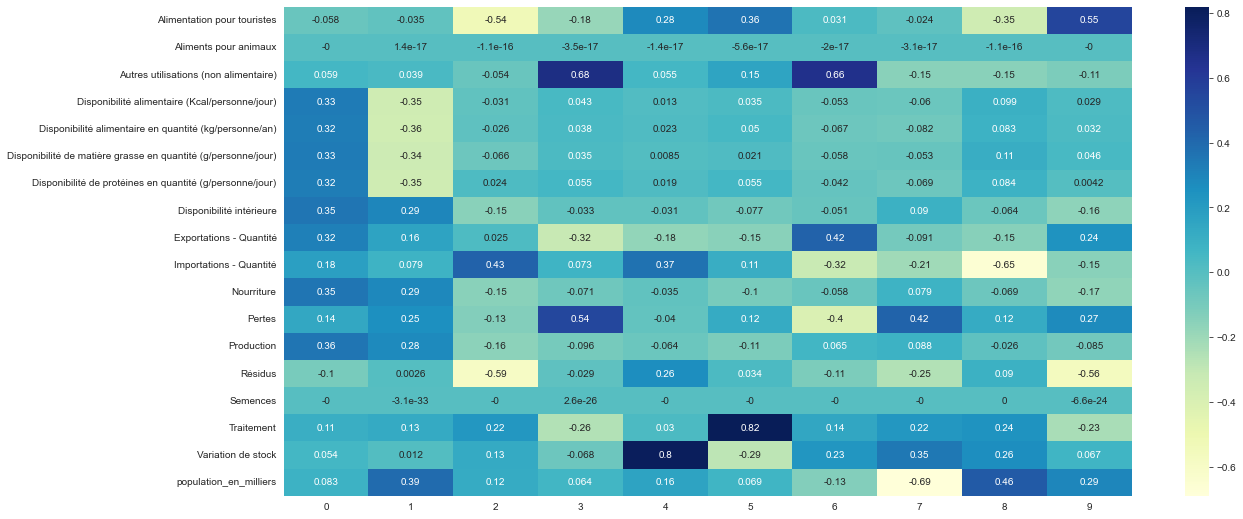

In [320]:
# adjust y-axis size dynamically
size_yaxis = round(X.shape[1] * 0.5)
fig, ax = plt.subplots(figsize=(19,size_yaxis))
# plot the first top_pc components
top_pc = 10
sns.heatmap(df_c.iloc[:,:top_pc], annot=True, cmap="YlGnBu", ax=ax)
plt.show()


In [316]:
model.components_

array([[-5.76577694e-02, -0.00000000e+00,  5.88874389e-02,
         3.34389181e-01,  3.24416449e-01,  3.30805927e-01,
         3.24924944e-01,  3.54058636e-01,  3.16005400e-01,
         1.78399622e-01,  3.54835052e-01,  1.35801217e-01,
         3.58017511e-01, -1.03331289e-01, -0.00000000e+00,
         1.05088190e-01,  5.40438053e-02,  8.32197089e-02],
       [-3.45141824e-02,  1.38777878e-17,  3.94736640e-02,
        -3.47744784e-01, -3.56803336e-01, -3.36699531e-01,
        -3.48796244e-01,  2.91771576e-01,  1.63581112e-01,
         7.85175259e-02,  2.86254508e-01,  2.54956953e-01,
         2.81250088e-01,  2.62563291e-03, -3.08148791e-33,
         1.29813704e-01,  1.16759083e-02,  3.91017384e-01],
       [-5.35538999e-01, -1.11022302e-16, -5.37661965e-02,
        -3.14699786e-02, -2.56308991e-02, -6.62650760e-02,
         2.41465175e-02, -1.52358249e-01,  2.52262995e-02,
         4.28800630e-01, -1.48600283e-01, -1.31803959e-01,
        -1.57595133e-01, -5.92089460e-01, -0.00000000e

In [219]:
df_c

,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,population_en_milliers
0,-0.057658,-3.451418e-02,-5.355390e-01,-1.841046e-01,2.781900e-01,3.642808e-01,3.122699e-02,-2.359626e-02,-3.514150e-01,5.514577e-01,-1.857850e-01,1.287905e-02,-2.974581e-02,6.854153e-04,3.694399e-04,4.735881e-04,2.924135e-17,-1.294568e-19
1,-0.000000,1.387779e-17,-1.110223e-16,-3.469447e-17,-1.387779e-17,-5.551115e-17,-1.994932e-17,-3.122502e-17,-1.110223e-16,-0.000000e+00,1.665335e-16,1.422473e-16,6.938894e-17,-9.617957e-16,1.729064e-14,3.198863e-14,1.000000e+00,4.156293e-05
2,0.058887,3.947366e-02,-5.376620e-02,6.834506e-01,5.509770e-02,1.543860e-01,6.566992e-01,-1.491546e-01,-1.471918e-01,-1.125212e-01,-9.292121e-02,-3.015838e-02,1.235055e-02,-4.033903e-04,1.457423e-02,1.927315e-02,-8.312979e-16,-1.664140e-18
3,0.334389,-3.477448e-01,-3.146998e-02,4.340812e-02,1.318817e-02,3.476165e-02,-5.337395e-02,-6.002346e-02,9.936332e-02,2.895462e-02,2.002485e-02,-1.844279e-01,-2.294114e-01,8.116502e-01,-2.632094e-03,3.211856e-03,7.997777e-16,-1.056606e-16
4,0.324416,-3.568033e-01,-2.563090e-02,3.798547e-02,2.291552e-02,5.013162e-02,-6.706056e-02,-8.221114e-02,8.322991e-02,3.195604e-02,-4.244065e-02,2.594890e-01,8.206624e-01,-2.191919e-02,7.054566e-05,-8.521563e-05,-3.291036e-17,2.844584e-18
5,0.330806,-3.366995e-01,-6.626508e-02,3.506070e-02,8.485116e-03,2.076998e-02,-5.843731e-02,-5.266904e-02,1.071899e-01,4.627386e-02,6.547959e-02,-7.017158e-01,-9.306179e-02,-4.958809e-01,1.614271e-03,-1.916196e-03,-4.510903e-16,6.455445e-17
6,0.324925,-3.487962e-01,2.414652e-02,5.471068e-02,1.929298e-02,5.523391e-02,-4.173731e-02,-6.930913e-02,8.351880e-02,4.194583e-03,-4.196187e-02,6.263171e-01,-5.132049e-01,-3.079143e-01,9.961142e-04,-1.261620e-03,-3.114166e-16,4.009484e-17
7,0.354059,2.917716e-01,-1.523582e-01,-3.329212e-02,-3.135606e-02,-7.690687e-02,-5.052793e-02,8.987163e-02,-6.396659e-02,-1.632451e-01,-2.746877e-01,-1.058768e-02,-3.915236e-03,2.863353e-03,2.415320e-01,-7.635412e-01,2.010169e-14,2.801675e-17
8,0.316005,1.635811e-01,2.522630e-02,-3.177903e-01,-1.756915e-01,-1.470938e-01,4.245630e-01,-9.087667e-02,-1.452680e-01,2.448011e-01,6.485495e-01,6.786393e-02,1.851236e-02,2.520836e-03,1.533522e-01,-2.489971e-02,-1.953976e-15,-6.425027e-18
9,0.178400,7.851753e-02,4.288006e-01,7.278099e-02,3.712914e-01,1.086283e-01,-3.180000e-01,-2.071532e-01,-6.549924e-01,-1.526759e-01,1.464883e-01,-3.733466e-02,1.649630e-03,-2.824667e-04,-6.216705e-02,1.012172e-02,6.788976e-16,2.505753e-18


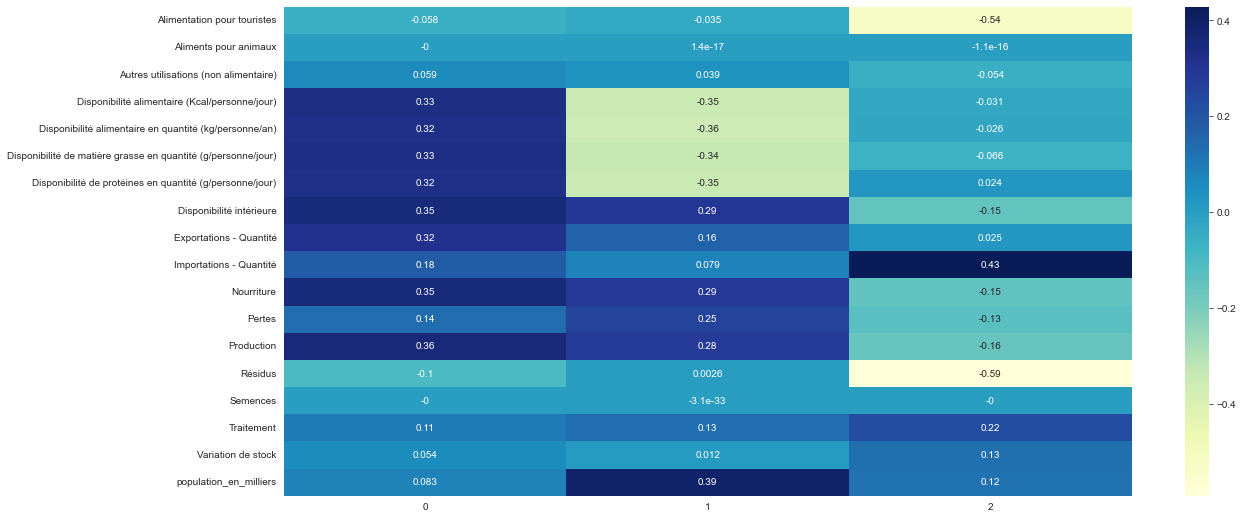

In [317]:
# adjust y-axis size dynamically
size_yaxis = round(X.shape[1] * 0.5)
fig, ax = plt.subplots(figsize=(19,size_yaxis))
# plot the first top_pc components
top_pc = 3
sns.heatmap(df_c.iloc[:,:top_pc], annot=True, cmap="YlGnBu", ax=ax)
plt.show()

# Conclusions :

In [119]:
## Nous avons donc 3 clusters qui apparaissent assez évidents.
# Le premier cluster sera composé d'îles et de pays plutôt pauvre avec une faible production de volaille qui importent des quantités plutôt faibles.
# Le second cluster sera composé de gros producteurs, gros exportateurs, ce sont des pays riches.
# Le 3ème cluster est composé de pays qui importent beaucoup (en général), qui vendent aussi mais sans être grossistes.

In [ ]:
# Conseil : Approfondir l'analyse avec davantage de variables plus intéressantes.